In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import random
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [2]:
stud.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


# Первичный анализ данных

### Для удобства переименуем столбцы 

In [3]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
                'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
                'study_time_granular', 'higher', 'internet', 'romantic', 'fam_rel',
                'free_time', 'go_out', 'health', 'absences', 'score']

In [5]:
print(stud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   fam_size             368 non-null    object 
 5   p_status             350 non-null    object 
 6   m_edu                392 non-null    float64
 7   f_edu                371 non-null    float64
 8   m_job                376 non-null    object 
 9   f_job                359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  travel_time          367 non-null    float64
 13  study_time           388 non-null    float64
 14  failures             373 non-null    float64
 15  school_sup           386 non-null    obj

In [6]:
print(stud.isnull().sum())

school                  0
sex                     0
age                     0
address                17
fam_size               27
p_status               45
m_edu                   3
f_edu                  24
m_job                  19
f_job                  36
reason                 17
guardian               31
travel_time            28
study_time              7
failures               22
school_sup              9
fam_sup                39
paid                   40
activities             14
nursery                16
study_time_granular     7
higher                 20
internet               34
romantic               31
fam_rel                27
free_time              11
go_out                  8
health                 15
absences               12
score                   6
dtype: int64


### В датасете имеются столбцы с нулевым значениями, которые надо будет заполнить

### В датасете 17 строковых столбцов и 13 числовых

### Рассмотрим все 30 столбцов по отдельности:

# school 

['GP' 'MS']
GP    349
MS     46
Name: school, dtype: int64


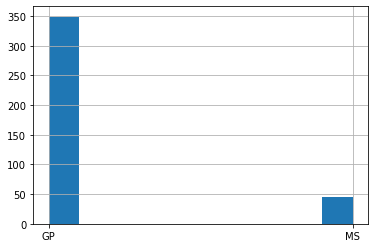

In [7]:
print(stud.school.unique())
print(stud.school.value_counts())
stud.school.hist()

##### Тут все в порядке. Две школы

#  sex

['F' 'M']
F    208
M    187
Name: sex, dtype: int64


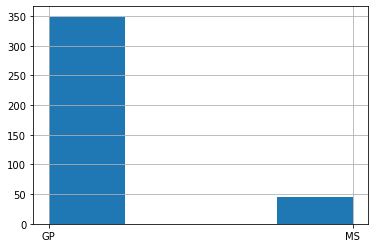

In [8]:
print(stud.sex.unique())
print(stud.sex.value_counts())
stud.school.hist(bins=4)

#### Учеников из школы GP больше, чем из MS

#  age

In [9]:
pd.DataFrame(stud.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

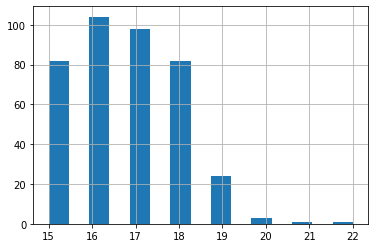

In [10]:
stud.age.hist(bins=15)
stud.age.describe()

#### Видим на гистограмме подозрительные значения (от 20 до 22). Проверим, являются ли они выбросами

In [11]:
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)

print('25-й перцентиль:{},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(
          f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR)
      )

25-й перцентиль:16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


### Исходя из границ выбросов, видим, что 21 и 22 , являются выбросами . Но так как эти возрасты являются важными для будущей модели, оставим их.


## address

In [12]:
stud.address.value_counts()

U    295
R     83
Name: address, dtype: int64

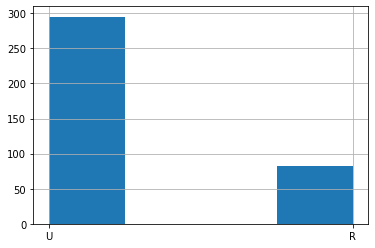

In [13]:
stud.address.hist(bins=4)

In [14]:
print(stud.address.unique())  # столбец содержит nan - строки

['U' nan 'R']


In [15]:
stud.address = stud.address.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.address.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.address.value_counts() > 10).sum())
print("Уникальных значений:", stud.address.nunique())
stud.loc[:, ['address']].info()

,address
U,295
R,83
nan,17


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### Учеников, проживающих в городе "U", больше, чем проживающих за городом "R".

In [16]:
# Заменим пустые значения на наиболее часто встречающиеся - "ученик живет в городе "

stud.address = stud.address.astype(str).apply(
    lambda x: 'U' if x.strip() == 'nan' else x)

,address
U,312
R,83


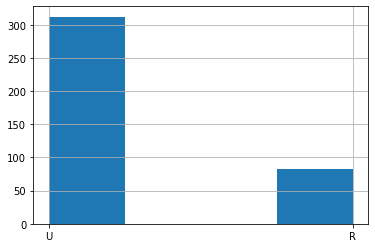

In [17]:
stud.address.hist(bins=4)
pd.DataFrame(stud.address.value_counts())

## fam_size

In [18]:
stud.fam_size.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

#### В столбце имеются пустые значения, которые надо будет заполнить

In [19]:
stud.fam_size = stud.fam_size.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.fam_size.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.fam_size.value_counts() > 10).sum())
print("Уникальных значений:", stud.fam_size.nunique())
stud.loc[:, ['fam_size']].info()

,fam_size
GT3,261
LE3,107
nan,27


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,fam_size
GT3,261
LE3,107
nan,27


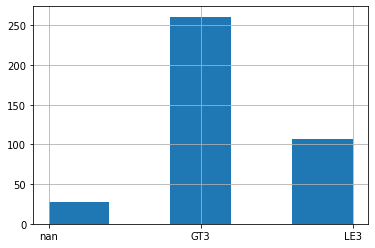

In [20]:
stud.fam_size.hist(bins=5)
pd.DataFrame(stud.fam_size.value_counts())

### Заменим пустые значения на наиболее часто встречающиеся - "размер семьи больше 3 человек " - GT3

In [21]:
stud.fam_size = stud.fam_size.astype(str).apply(
    lambda x: 'GT3' if x.strip() == 'nan' else x)

,fam_size
GT3,288
LE3,107


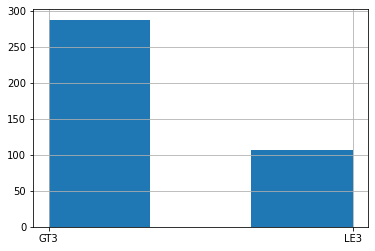

In [22]:
stud.fam_size.hist(bins=3)
pd.DataFrame(stud.fam_size.value_counts())

# p_status

In [23]:
stud.p_status.unique()

array(['A', nan, 'T'], dtype=object)

### В столбце имеются пустые значения, которые надо будет заполнить

In [24]:
stud.p_status = stud.p_status.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.p_status.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.p_status.value_counts() > 10).sum())
print("Уникальных значений:", stud.p_status.nunique())
stud.loc[:, ['p_status']].info()

,p_status
T,314
nan,45
A,36


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


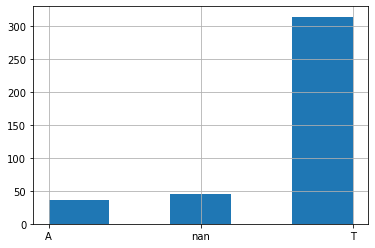

In [25]:
stud.p_status.hist(bins=5)

### Заменим пустые значения на наиболее часто встречающиеся - "живут вместе " - T

In [26]:
stud.p_status = stud.p_status.astype(str).apply(
    lambda x: 'T' if x.strip() == 'nan' else x)

,p_status
T,359
A,36


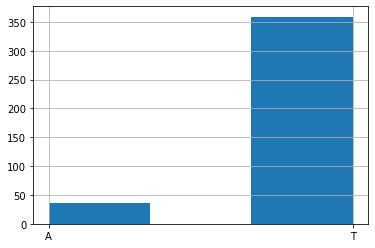

In [27]:
stud.p_status.hist(bins=3)
pd.DataFrame(stud.p_status.value_counts())

# m_edu

### Столбец числовой ,содержит пустые значения, которые надо заполнить

In [28]:
stud.m_edu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

In [29]:
stud.m_edu.isna().sum()  # 3 пустых значения

3

In [30]:
stud.m_edu = stud.m_edu.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.m_edu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.m_edu.value_counts() > 10).sum())
print("Уникальных значений:", stud.m_edu.nunique())
stud.loc[:, ['m_edu']].info()

,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
nan,3


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_edu   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


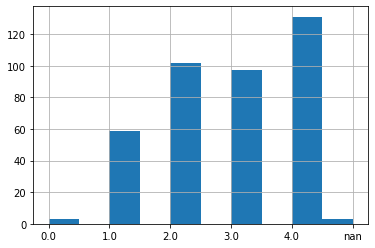

In [31]:
stud.m_edu.sort_values().hist()

In [32]:
stud.m_edu.median()  # медиальное значение

3.0

#### Заполним пропуски средней оценкой "3.0"

In [33]:
stud.m_edu = stud.m_edu.astype(str).apply(
    lambda x: '3.0' if x.strip() == 'nan' else x)

In [34]:
stud.m_edu.sort_values()

127    0.0
324    0.0
249    0.0
150    1.0
156    1.0
      ... 
291    4.0
102    4.0
101    4.0
129    4.0
0      4.0
Name: m_edu, Length: 395, dtype: object

,m_edu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


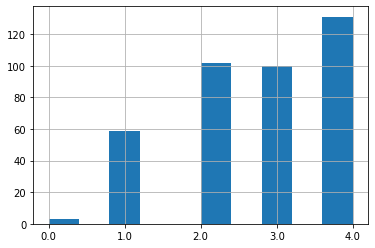

In [35]:
stud.m_edu.sort_values().hist()
pd.DataFrame(stud.m_edu.value_counts())

# f_edu 

### Столбец числовой ,содержит пустые значения, которые надо заполнить

In [36]:
stud.f_edu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [37]:
stud.f_edu.isna().sum()  # 24 пустых значения

24

In [38]:
stud.f_edu = stud.f_edu.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.f_edu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.f_edu.value_counts() > 10).sum())
print("Уникальных значений:", stud.f_edu.nunique())
stud.loc[:, ['f_edu']].info()

,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
nan,24
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_edu   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


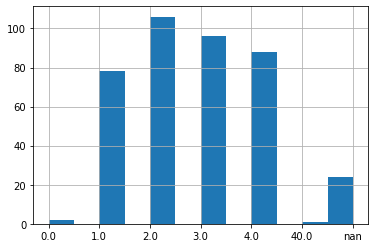

In [39]:
stud.f_edu.sort_values().hist(bins=12)

In [40]:
stud.f_edu.median()  # медиальное значение

2.0

### Проанализировав столбец, мы видим невозможную оценку "40". Предположим, что это опечатка и исправим ее на оценку "4"
### Также заполним все пустые значения средней оценкой "2"

In [41]:
stud.f_edu = stud.f_edu.astype(str).apply(
    lambda x: '2.0' if x.strip() == 'nan' else x)
stud.f_edu = stud.f_edu.astype(str).apply(
    lambda x: '4.0' if x.strip() == '40.0' else x)

,f_edu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


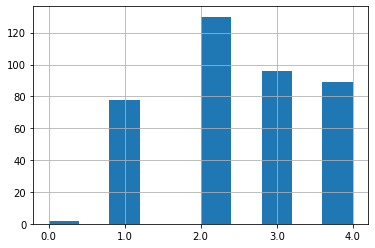

In [42]:
stud.f_edu.sort_values().hist()
pd.DataFrame(stud.f_edu.value_counts())

# m_job

### Столбец числовой ,содержит пустые значения, которые надо заполнить

In [43]:
stud.m_job.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [44]:
stud.m_job = stud.m_job.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.m_job.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.m_job.value_counts() > 10).sum())
print("Уникальных значений:", stud.m_job.nunique())
stud.loc[:, ['m_job']].info()

,m_job
other,133
services,98
at_home,58
teacher,55
health,32
nan,19


Значений, встретившихся в столбце более 10 раз: 6
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Предположим, что есть связь между образованием матери и сферой ее работы

In [45]:
stud[stud.m_job == 'nan'].groupby('m_edu')['m_job'].count()

m_edu
1.0    2
2.0    4
3.0    6
4.0    7
Name: m_job, dtype: int64

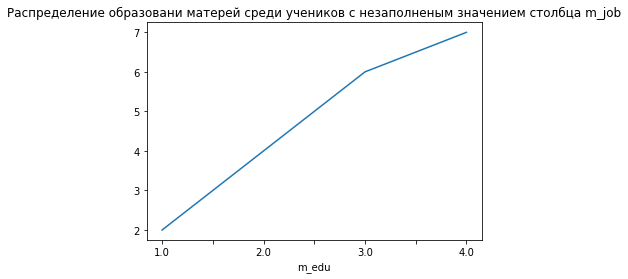

In [46]:
stud[stud.m_job == 'nan'].groupby('m_edu')['m_job'].count().plot(
    title='Распределение образовани матерей среди учеников с незаполненым значением столбца m_job')

### Мы видим, что больше всего матерей имели высшее образование.

### Рассмотрим внимательнее по всей таблице количество матерей для каждого рода деятельности, исходя из образования.

# Высшее образование "4.0"
#### Для высшего образования характерна работа учителем. Сфера здравоохранения, гос. служба и другое распределены примерно одинаково. 

In [47]:
pd.DataFrame(stud[stud.m_edu == '4.0'].groupby('m_job')['m_job'].count())

,m_job
m_job,
at_home,2
health,24
nan,7
other,22
services,24
teacher,52


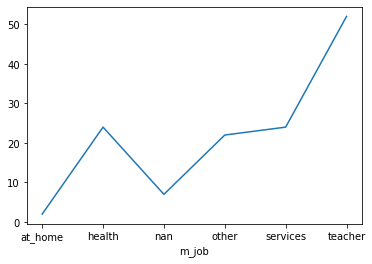

In [48]:
stud[stud.m_edu == '4.0'].groupby('m_job')['m_job'].count().plot()

# Cреднее специальное или 11 классов "3.0"
#### Для среднего образования характерна работа в гос. службе или другое ("services","other")

In [49]:
pd.DataFrame(stud[stud.m_edu == '3.0'].groupby('m_job')['m_job'].count())

,m_job
m_job,
at_home,8
health,5
nan,6
other,39
services,39
teacher,3


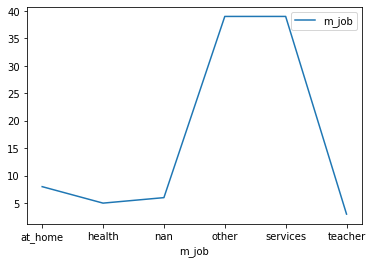

In [50]:
pd.DataFrame(stud[stud.m_edu == '3.0'].groupby(
    'm_job')['m_job'].count()).plot()

# 5-9 классы "2.0"
#### Для неполного школьного образования характерна работа в  другое ('other')

In [51]:
stud[stud.m_edu == '2.0'].groupby('m_job')['m_job'].count()

m_job
at_home     21
health       2
nan          4
other       45
services    30
Name: m_job, dtype: int64

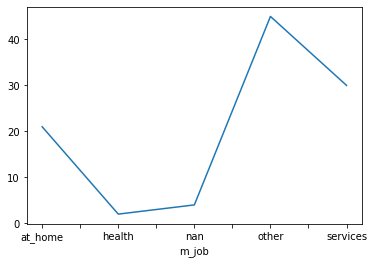

In [52]:
stud[stud.m_edu == '2.0'].groupby('m_job')['m_job'].count().plot()

# 4 класса "1.0"
#### Для образования уровня начальной школы характерна работа дома или в другое ("at_home","other")

In [53]:
stud[stud.m_edu == '1.0'].groupby('m_job')['m_job'].count()

m_job
at_home     25
health       1
nan          2
other       26
services     5
Name: m_job, dtype: int64

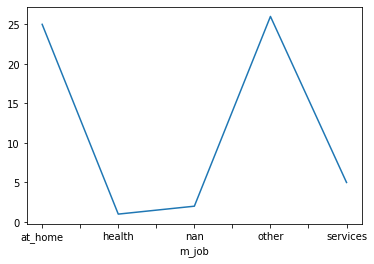

In [54]:
stud[stud.m_edu == '1.0'].groupby('m_job')['m_job'].count().plot()

### матерей без образования не рассматриваем, так как их нет в выборке m_job == 'nan'

# Заменим пустые значения в столбце m_job исходя из нашего анализа уровня образования

In [55]:
# Создаем списки из нужных нам индексов, соответсвующих уровню образования
m_edu_list_4 = stud.index[(stud['m_edu'] == '4.0') &
                          (stud['m_job'] == 'nan')].tolist()
m_edu_list_3 = stud.index[(stud['m_edu'] == '3.0') &
                          (stud['m_job'] == 'nan')].tolist()
m_edu_list_2 = stud.index[(stud['m_edu'] == '2.0') &
                          (stud['m_job'] == 'nan')].tolist()
m_edu_list_1 = stud.index[(stud['m_edu'] == '1.0') &
                          (stud['m_job'] == 'nan')].tolist()

In [56]:
for i, j in enumerate(stud.m_job):
    if j == 'nan':
        if i in m_edu_list_4:
            stud.m_job[i] = 'teacher'
        elif i in m_edu_list_3:
            # для уровня образования 3.0 заполняем случайно
            stud.m_job[i] = random.choice(['services', 'other'])
        elif i in m_edu_list_2:
            stud.m_job[i] = 'other'
        elif i in m_edu_list_1:
            # для уровня образования 1.0 заполняем случайно
            stud.m_job[i] = random.choice(['at_home', 'other'])

<ipython-input-56-2903853356d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.m_job[i] = 'teacher'
<ipython-input-56-2903853356d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.m_job[i] = random.choice(['services', 'other'])
<ipython-input-56-2903853356d1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.m_job[i] = 'other'
<ipython-input-56-2903853356d1>:12: SettingWithCopyWarning: 
A value is trying to be set on a

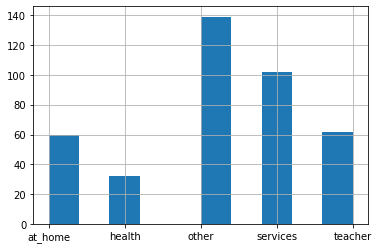

In [57]:
stud.m_job.hist()

# f_job

#### Проделаем ту же работу для столбца работы отца f_job

In [58]:
stud.f_job.unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [59]:
stud.f_job = stud.f_job.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.f_job.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.f_job.value_counts() > 10).sum())
print("Уникальных значений:", stud.f_job.nunique())
stud.loc[:, ['f_job']].info()

,f_job
other,197
services,102
nan,36
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 6
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [60]:
# Смотрим значения столбцов _edu среди m_job со значением 'nan'
df_f_nan = stud[stud.f_job == 'nan']

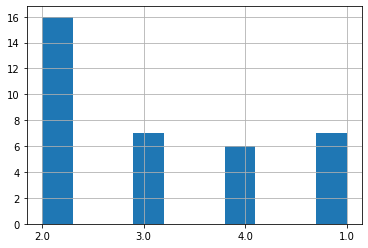

In [61]:
df_f_nan.f_edu.hist()

In [62]:
# Распределение уровня образования отцов
stud[stud.f_job == 'nan'].groupby('f_edu')['f_job'].count()

f_edu
1.0     7
2.0    16
3.0     7
4.0     6
Name: f_job, dtype: int64

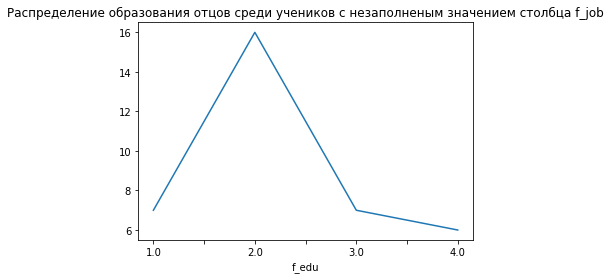

In [63]:
stud[stud.f_job == 'nan'].groupby('f_edu')['f_job'].count().plot(
    title='Распределение образования отцов среди учеников с незаполненым значением столбца f_job')

### Мы видим, что больше всего отцов имели высшее неполное школьное образование.

### Рассмотрим внимательнее по всей таблице количество отцов для каждого рода деятельности, исходя из образования.


#### Для всех уровней образования характерна работа в другое 'other'

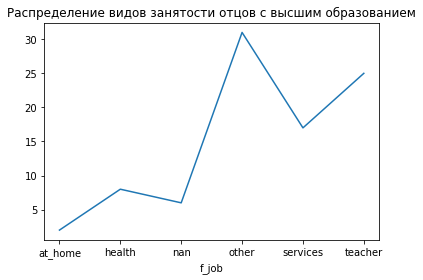

In [64]:
pd.DataFrame(stud[stud.f_edu == '4.0'].groupby('f_job')['f_job'].count())
stud[stud.f_edu == '4.0'].groupby('f_job')['f_job'].count().plot(
    title='Распределение видов занятости отцов с высшим образованием')

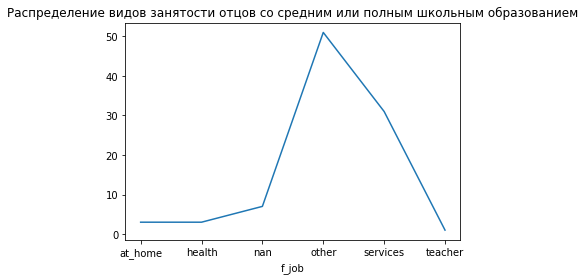

In [65]:
pd.DataFrame(stud[stud.f_edu == '3.0'].groupby('f_job')['f_job'].count())
stud[stud.f_edu == '3.0'].groupby('f_job')['f_job'].count().plot(
    title='Распределение видов занятости отцов со средним или полным школьным образованием')

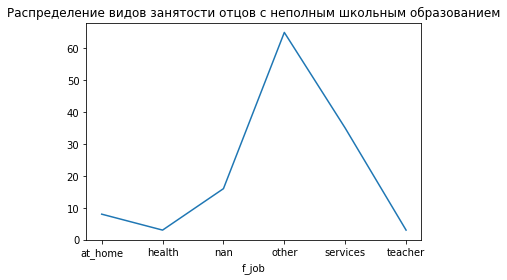

In [66]:
pd.DataFrame(stud[stud.f_edu == '2.0'].groupby('f_job')['f_job'].count())
stud[stud.f_edu == '2.0'].groupby('f_job')['f_job'].count().plot(
    title='Распределение видов занятости отцов с неполным школьным образованием')

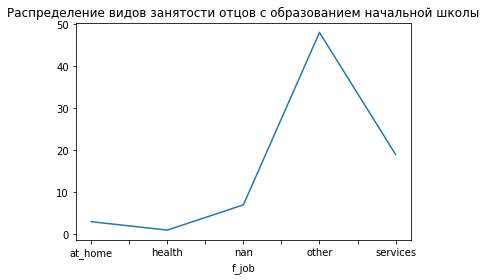

In [67]:
pd.DataFrame(stud[stud.f_edu == '1.0'].groupby('f_job')['f_job'].count())
stud[stud.f_edu == '1.0'].groupby('f_job')['f_job'].count().plot(
    title='Распределение видов занятости отцов с образованием начальной школы')

### Заменим пустые значения на наиболее часто встречающиеся - "other " 

In [68]:
stud.f_job = stud.f_job.astype(str).apply(
    lambda x: 'other' if x.strip() == 'nan' else x)

,f_job
other,233
services,102
teacher,29
at_home,16
health,15


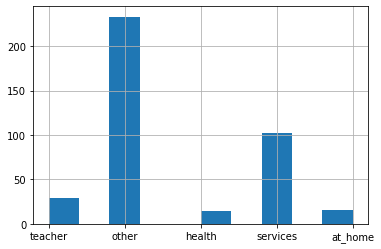

In [69]:
stud.f_job.hist()
pd.DataFrame(stud.f_job.value_counts())

# reason
### Столбец строковый ,содержит пустые значения, которые надо заполнить

In [70]:
stud.reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [71]:
stud.reason = stud.reason.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.reason.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.reason.value_counts() > 10).sum())
print("Уникальных значений:", stud.reason.nunique())
stud.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34
nan,17


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


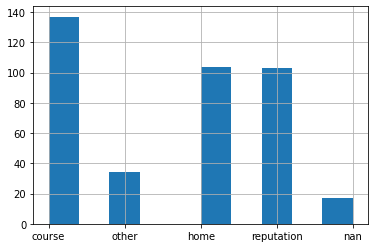

In [72]:
stud.reason.hist()

### Видим, что чаще всего причиной выбора школы является образовательная программа.Но , предположим, что для учеников из школы "GP" важным была репутация, так как количество учеников из этой школы кратно больше количества учеников из другой "MS"

In [73]:
pd.DataFrame(stud[(stud.reason == 'nan')].groupby('school')['reason'].count())

,reason
school,
GP,13
MS,4


### Разберем каждую школу

# GP

In [74]:
stud[(stud.reason != 'nan') & (stud.school == 'GP')
     ].groupby('reason')['reason'].count()

reason
course        119
home           94
other          25
reputation     98
Name: reason, dtype: int64

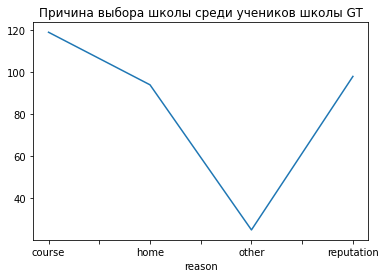

In [75]:
stud[(stud.reason != 'nan') & (stud.school == 'GP')].groupby('reason')[
    'reason'].count().plot(title='Причина выбора школы среди учеников школы GT')

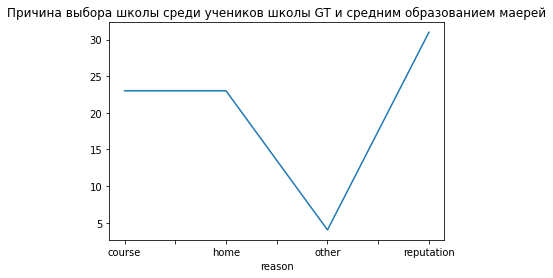

In [76]:
stud[(stud.reason != 'nan') & (stud.school == 'GP') & (stud.f_edu == '3.0')].groupby('reason')[
    'reason'].count().plot(title='Причина выбора школы среди учеников школы GT и средним образованием маерей')

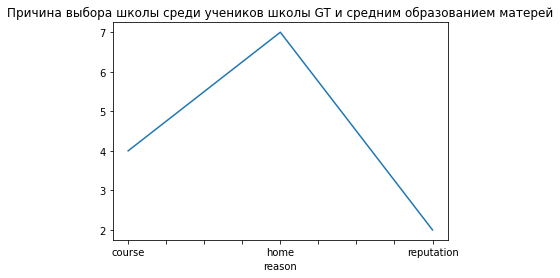

In [77]:
stud[(stud.reason != 'nan') & (stud.school == 'GP') & (stud.p_status == 'A') & (stud.m_edu == '3.0')].groupby('reason')[
    'reason'].count().plot(title='Причина выбора школы среди учеников школы GT и средним образованием матерей')

# MS

In [78]:
stud[(stud.reason == 'nan') & (stud.school == 'MS')]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,study_time_granular,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
363,MS,F,17,U,LE3,T,4.0,4.0,at_home,other,nan,mother,1.0,2.0,0.0,no,NaN,yes,yes,yes,-6.0,yes,yes,yes,2.0,3.0,4.0,1.0,0.0,75.0
373,MS,F,17,R,GT3,T,1.0,2.0,other,other,nan,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,yes,NaN,NaN,5.0,5.0,1.0,14.0,25.0
382,MS,M,17,U,GT3,T,2.0,3.0,other,services,nan,father,2.0,2.0,0.0,no,no,no,yes,yes,-6.0,NaN,yes,no,4.0,4.0,3.0,3.0,2.0,50.0
394,MS,M,19,U,LE3,T,1.0,1.0,other,at_home,nan,father,1.0,1.0,0.0,NaN,no,no,no,yes,-3.0,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0


In [79]:
pd.DataFrame(stud[(stud.reason != 'nan') & (
    stud.school == 'MS')].groupby('reason')['reason'].count())

,reason
reason,
course,18
home,10
other,9
reputation,5


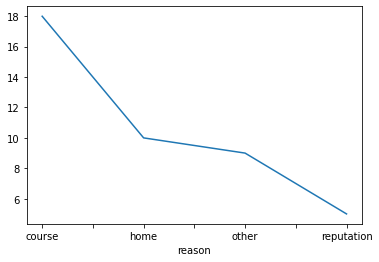

In [80]:
stud[(stud.reason != 'nan') & (stud.school == 'MS')
     ].groupby('reason')['reason'].count().plot()

## Вывод: для учеников обеих школ важнейшей причиной выбора школы является образовательный курс. Но среди учеников школы GP из неполных семей  , где у матери среднее образование важна близость к дому, а в полных семьях, где у отца среднее образование важна репутация.

#### Заполним пустые значения столбцов, исходя из нашего анализа

In [81]:
MS_list = stud.index[(stud['school'] == 'MS') &
                     (stud['reason'] == 'nan')].tolist()  # Список с индексами учеников из школы MS

GP_list_general = stud.index[(stud['school'] == 'GP') &
                             (stud['reason'] == 'nan')].tolist()  # Список с индексами учеников из школы GP

GP_list_m = stud.index[(stud['school'] == 'GP') &
                       (stud['reason'] == 'nan') & (stud.p_status == 'A')
                       & (stud.m_edu == '3.0')].tolist()  # Список с индексами учеников из школы GP, из неполной семьи, у которых мать со средним образованием

GP_list_f = stud.index[(stud['school'] == 'GP') &
                       (stud['reason'] == 'nan') &
                       (stud['f_edu'] == '3.0')].tolist()  # Список с индексами учеников из школы GP, у которых отец со средним образованием

In [82]:
for i, j in enumerate(stud.reason):
    if j == 'nan':
        if i in MS_list:
            stud.reason[i] = 'course'
        elif i in GP_list_general:
            if i in GP_list_m:
                stud.reason[i] = 'home'
            elif i in GP_list_f:
                stud.reason[i] = 'reputation'
            else:
                stud.reason[i] = 'course'

<ipython-input-82-b9e56fbb74f4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.reason[i] = 'reputation'
<ipython-input-82-b9e56fbb74f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.reason[i] = 'course'
<ipython-input-82-b9e56fbb74f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.reason[i] = 'home'
<ipython-input-82-b9e56fbb74f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

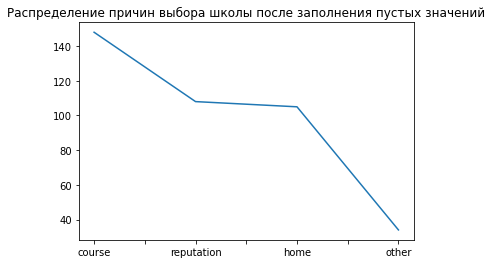

In [83]:
pd.DataFrame(stud.reason.value_counts())
stud.reason.value_counts().plot(
    title='Распределение причин выбора школы после заполнения пустых значений')

# guardian 
### Столбец строковый ,содержит пустые значения, которые надо заполнить

In [84]:
stud.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [85]:
stud.guardian = stud.guardian.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.guardian.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.guardian.value_counts() > 10).sum())
print("Уникальных значений:", stud.guardian.nunique())
stud.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
nan,31
other,28


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


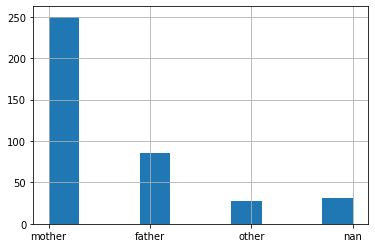

In [86]:
stud.guardian.hist()

## Предположим, что опекун может отличаться в зависимости от того, является ли семья полной или от размера семьи.
## Проверим это среди учеников, у которых столбец guardian заполнен:

,guardian
guardian,
father,4
mother,27
other,4


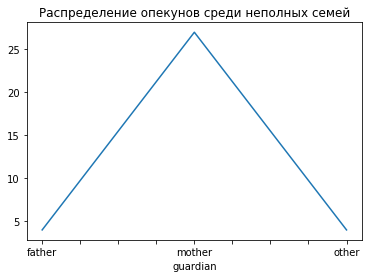

In [87]:
# Распределение опекунов среди неполных семей
stud[(stud.guardian != 'nan') & (stud.p_status == 'A')].groupby('guardian')[
    'guardian'].count().plot(title='Распределение опекунов среди неполных семей')
pd.DataFrame(stud[(stud.guardian != 'nan') & (
    stud.p_status == 'A')].groupby('guardian')['guardian'].count())

,guardian
guardian,
father,82
mother,223
other,24


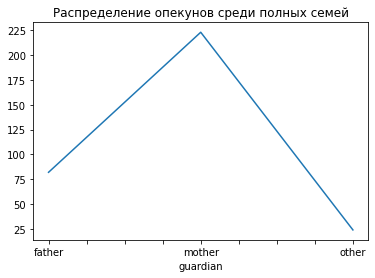

In [88]:
# Распределение опекунов среди полных семей
stud[(stud.guardian != 'nan') & (stud.p_status == 'T')].groupby('guardian')[
    'guardian'].count().plot(title='Распределение опекунов среди полных семей')
pd.DataFrame(stud[(stud.guardian != 'nan') & (
    stud.p_status == 'T')].groupby('guardian')['guardian'].count())

,guardian
guardian,
father,24
mother,72
other,5


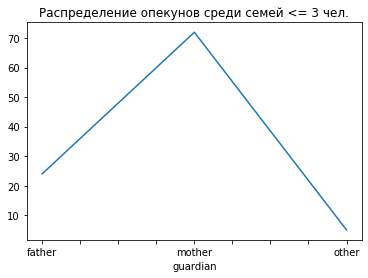

In [89]:
# Распределение опекунов среди семей <= 3 чел.
stud[(stud.guardian != 'nan') & (stud.fam_size == 'LE3')].groupby('guardian')[
    'guardian'].count().plot(title='Распределение опекунов среди семей <= 3 чел.')
pd.DataFrame(stud[(stud.guardian != 'nan') & (
    stud.fam_size == 'LE3')].groupby('guardian')['guardian'].count())

,guardian
guardian,
father,62
mother,178
other,23


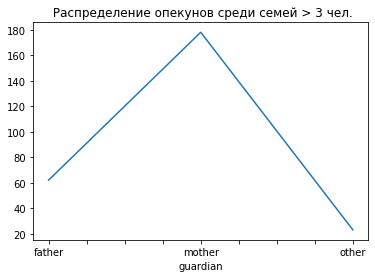

In [90]:
# Распределение опекунов среди семей > 3 чел.

stud[(stud.guardian != 'nan') & (stud.fam_size == 'GT3')].groupby('guardian')[
    'guardian'].count().plot(title=' Распределение опекунов среди семей > 3 чел.')
pd.DataFrame(stud[(stud.guardian != 'nan') & (
    stud.fam_size == 'GT3')].groupby('guardian')['guardian'].count())

### Вывод: пустые значения можно заполнить  самым частовстречающимся значением 'mother'

In [91]:
stud.guardian = stud.guardian.astype(str).apply(
    lambda x: 'mother' if x.strip() == 'nan' else x)

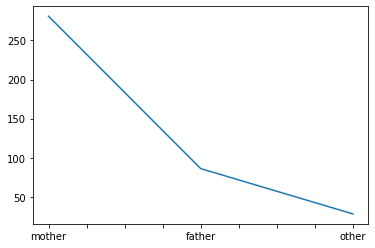

In [92]:
pd.DataFrame(stud.guardian.value_counts())
stud.guardian.value_counts().plot()

# travel_time
### Столбец числовой. Содержит пустые значения, которые надо заполнить

In [93]:
stud.travel_time.unique()

array([ 2.,  1.,  3., nan,  4.])

In [94]:
stud.travel_time = stud.travel_time.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.travel_time.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.travel_time.value_counts() > 10).sum())
print("Уникальных значений:", stud.travel_time.nunique())
stud.loc[:, ['travel_time']].info()

,travel_time
1.0,242
2.0,96
nan,28
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   travel_time  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


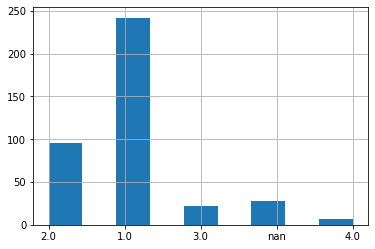

In [95]:
stud.travel_time.hist(bins=9)

In [96]:
pd.DataFrame(stud[(stud.travel_time == 'nan')].groupby(
    'address')['travel_time'].count())

,travel_time
address,
R,7
U,21


##  Посмотрим внимательнее, какие закономерности есть для каждого времени в пути среди учеников с заполненными значениями travel_time

### Предположим, что на время пути до школы влияет городской ученик или нет

# 1 - <2 часов

,reason
reason,
course,86
home,69
other,21
reputation,66


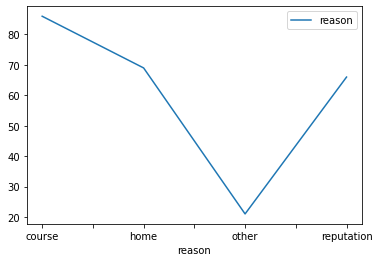

In [97]:
pd.DataFrame(stud[stud.travel_time == '1.0'].groupby(
    'reason')['reason'].count()).plot()
pd.DataFrame(stud[stud.travel_time == '1.0'].groupby(
    'reason')['reason'].count())

,address
address,
R,34
U,208


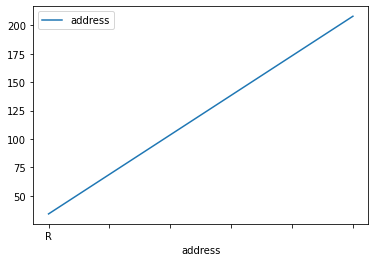

In [98]:
pd.DataFrame(stud[stud.travel_time == '1.0'].groupby(
    'address')['address'].count()).plot()
pd.DataFrame(stud[stud.travel_time == '1.0'].groupby(
    'address')['address'].count())

# 2 - 2-5 часов

,address
address,
R,26
U,70


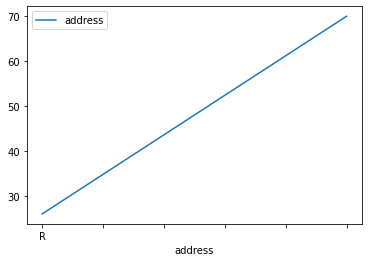

In [99]:
pd.DataFrame(stud[stud.travel_time == '2.0'].groupby(
    'address')['address'].count()).plot()
pd.DataFrame(stud[stud.travel_time == '2.0'].groupby(
    'address')['address'].count())

,address
address,
R,12
U,10


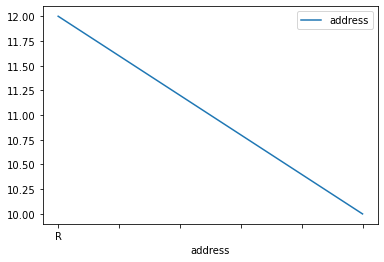

In [100]:
pd.DataFrame(stud[stud.travel_time == '3.0'].groupby(
    'address')['address'].count()).plot()
pd.DataFrame(stud[stud.travel_time == '3.0'].groupby(
    'address')['address'].count())

,address
address,
R,4
U,3


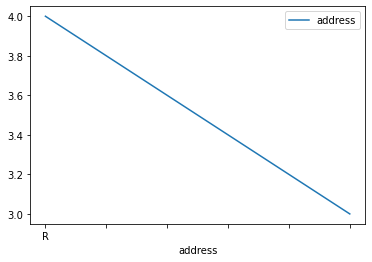

In [101]:
pd.DataFrame(stud[stud.travel_time == '4.0'].groupby(
    'address')['address'].count()).plot()
pd.DataFrame(stud[stud.travel_time == '4.0'].groupby(
    'address')['address'].count())

,travel_time
travel_time,
1.0,208
2.0,70
3.0,10
4.0,3


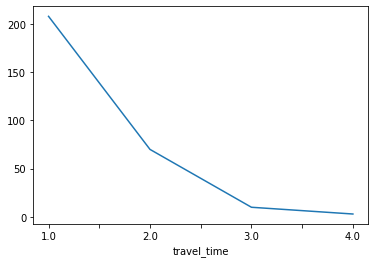

In [102]:
stud[(stud.travel_time != 'nan') & (
    stud.address == 'U')].groupby('travel_time')['travel_time'].count().plot()
pd.DataFrame(stud[(stud.travel_time != 'nan') & (
    stud.address == 'U')].groupby('travel_time')['travel_time'].count())

,travel_time
travel_time,
1.0,34
2.0,26
3.0,12
4.0,4


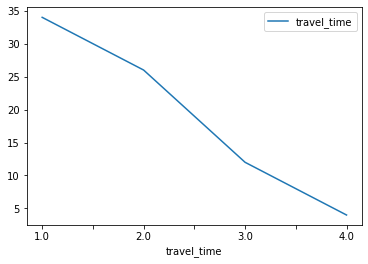

In [103]:
pd.DataFrame(stud[(stud.travel_time != 'nan') & (
    stud.address == 'R')].groupby('travel_time')['travel_time'].count()).plot()
pd.DataFrame(stud[(stud.travel_time != 'nan') & (
    stud.address == 'R')].groupby('travel_time')['travel_time'].count())

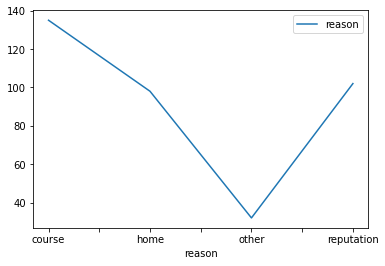

In [104]:
pd.DataFrame(stud[(stud.travel_time != 'nan')].groupby(
    'reason')['reason'].count()).plot()

In [105]:
stud.travel_time.median()  # Медиальное значение

1.0

### Независимо от места жительства ученика, причины выбора школы в большинстве случаев время пути <15 мин.

### Наиболее вероятно можем сказать,что те ученики причиной выбора школы которых была близость к дому проводят в пути меньше 15 минут .
### Заполним пустые значения исходя из этого вывода:

In [106]:
stud.travel_time = stud.travel_time.astype(str).apply(
    lambda x: '1.0' if x.strip() == 'nan' else x)

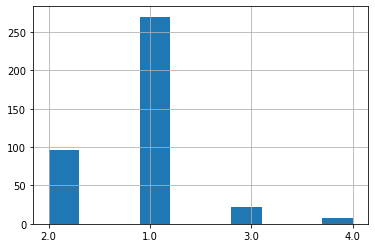

In [107]:
stud.travel_time.hist()

# study_time 
### Столбец числовой. Содержит пустые значения, которые надо заполнить

In [108]:
stud.study_time.unique()

array([ 2.,  3.,  1., nan,  4.])

In [109]:
stud.study_time = stud.study_time.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.study_time.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.study_time.value_counts() > 10).sum())
print("Уникальных значений:", stud.study_time.nunique())
stud.loc[:, ['study_time']].info()

,study_time
2.0,194
1.0,103
3.0,64
4.0,27
nan,7


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   study_time  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


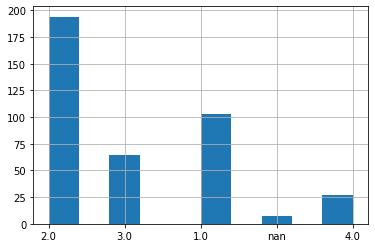

In [110]:
stud.study_time.hist()

In [111]:
stud.study_time.median()

2.0

### Заполним пропущенные значения медиальным значением 2.0

In [112]:
stud.study_time = stud.study_time.astype(str).apply(
    lambda x: '2.0' if x.strip() == 'nan' else x)

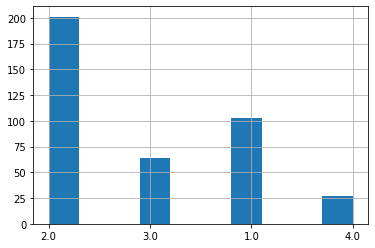

In [113]:
stud.study_time.hist()

# failures
### Столбец числовой. Содержит пустые значения, которые надо заполнить

In [114]:
stud.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [115]:
stud.failures = stud.failures.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.failures.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.failures.value_counts() > 10).sum())
print("Уникальных значений:", stud.failures.nunique())
stud.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
nan,22
2.0,16
3.0,15


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   failures  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


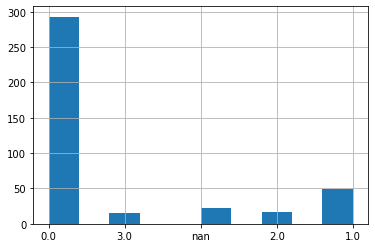

In [116]:
stud.failures.hist()

### Заполним пропуски самым частовстречающимся значением '0', так как не нашли признаков для  подробного разделения количества неудач в промежутке от 1 до 3

In [117]:
stud.failures = stud.failures.astype(str).apply(
    lambda x: '0.0' if x.strip() == 'nan' else x)

,failures
0.0,315
1.0,49
2.0,16
3.0,15


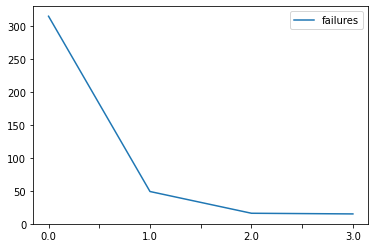

In [118]:
pd.DataFrame(stud.failures.value_counts()).plot()
pd.DataFrame(stud.failures.value_counts())

# school_sup 
#### Строкоый столбец. Есть пустые значения, которые надо заполнить

In [119]:
stud.school_sup.unique()

array(['yes', 'no', nan], dtype=object)

In [120]:
stud.school_sup = stud.school_sup.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.school_sup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.school_sup.value_counts() > 10).sum())
print("Уникальных значений:", stud.school_sup.nunique())
stud.loc[:, ['school_sup']].info()

,school_sup
no,335
yes,51
nan,9


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,failures
failures,
0.0,7
1.0,1
3.0,1


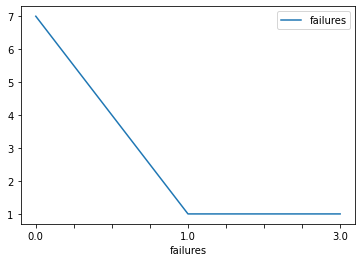

In [121]:
pd.DataFrame(stud[stud.school_sup == 'nan'].groupby(
    'failures')['failures'].count()).plot()
pd.DataFrame(stud[stud.school_sup == 'nan'].groupby(
    'failures')['failures'].count())

,failures
failures,
0.0,308
1.0,48
2.0,16
3.0,14


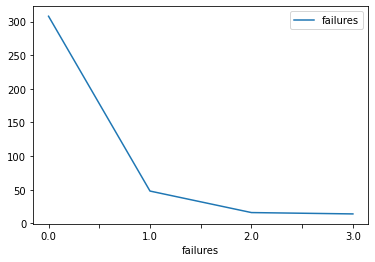

In [122]:
pd.DataFrame(stud[stud.school_sup != 'nan'].groupby(
    'failures')['failures'].count()).plot()
pd.DataFrame(stud[stud.school_sup != 'nan'].groupby(
    'failures')['failures'].count())

# Предположим, что доп. образовательная поддержка зависит от времени на учебу помимо школьного

,school_sup
school_sup,
no,88
yes,10


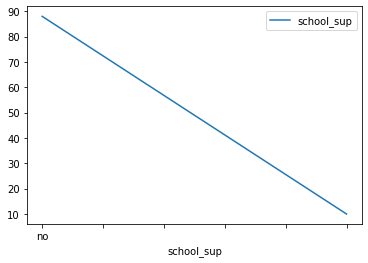

In [123]:
pd.DataFrame(stud[(stud.school_sup != 'nan') & (stud.study_time == '1.0')].groupby(
    'school_sup')['school_sup'].count()).plot()
pd.DataFrame(stud[(stud.school_sup != 'nan') & (
    stud.study_time == '1.0')].groupby('school_sup')['school_sup'].count())

,school_sup
school_sup,
no,167
yes,30


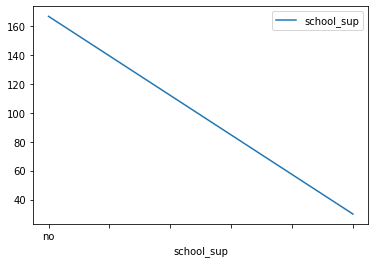

In [124]:
pd.DataFrame(stud[(stud.school_sup != 'nan') & (stud.study_time == '2.0')].groupby(
    'school_sup')['school_sup'].count()).plot()
pd.DataFrame(stud[(stud.school_sup != 'nan') & (
    stud.study_time == '2.0')].groupby('school_sup')['school_sup'].count())

,school_sup
school_sup,
no,58
yes,6


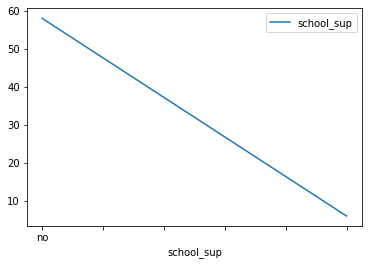

In [125]:
pd.DataFrame(stud[(stud.school_sup != 'nan') & (stud.study_time == '3.0')].groupby(
    'school_sup')['school_sup'].count()).plot()
pd.DataFrame(stud[(stud.school_sup != 'nan') & (
    stud.study_time == '3.0')].groupby('school_sup')['school_sup'].count())

,school_sup
school_sup,
no,22
yes,5


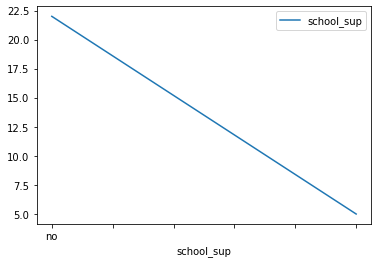

In [126]:
pd.DataFrame(stud[(stud.school_sup != 'nan') & (stud.study_time == '4.0')].groupby(
    'school_sup')['school_sup'].count()).plot()
pd.DataFrame(stud[(stud.school_sup != 'nan') & (
    stud.study_time == '4.0')].groupby('school_sup')['school_sup'].count())

### Заполним пустые значения наиболее частовстречающимся значением "no"

In [127]:
stud.school_sup = stud.school_sup.astype(str).apply(
    lambda x: 'no' if x.strip() == 'nan' else x)

,school_sup
no,344
yes,51


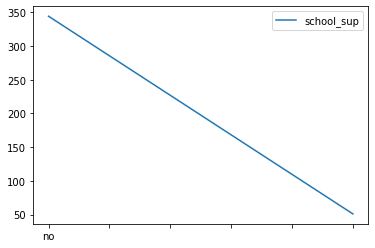

In [128]:
pd.DataFrame(stud.school_sup.value_counts()).plot()
pd.DataFrame(stud.school_sup.value_counts())

# fam_sup 
###  Столбец строковый. Содержит пустые значения

In [129]:
stud.fam_sup.unique()

array(['no', 'yes', nan], dtype=object)

In [130]:
stud.fam_sup = stud.fam_sup.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.fam_sup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.fam_sup.value_counts() > 10).sum())
print("Уникальных значений:", stud.fam_sup.nunique())
stud.loc[:, ['fam_sup']].info()

,fam_sup
yes,219
no,137
nan,39


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_sup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


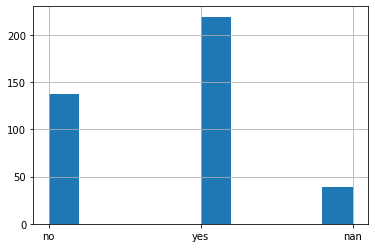

In [131]:
stud.fam_sup.hist()

### Предположим, что семейная образовательная поддержка зависит от пола  и возраста ученика

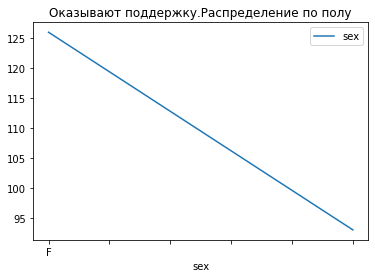

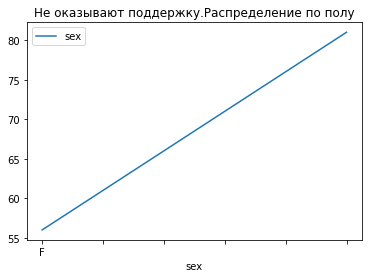

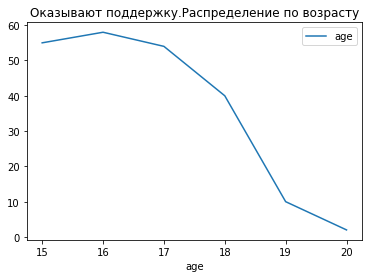

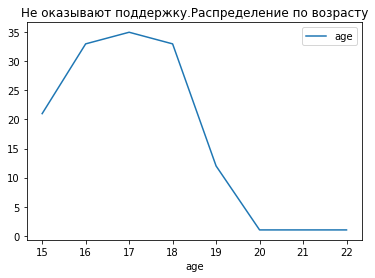

In [132]:
pd.DataFrame(stud[stud.fam_sup == 'yes'].groupby(
    'sex')['sex'].count()).plot(title='Оказывают поддержку.Распределение по полу')
pd.DataFrame(stud[stud.fam_sup == 'no'].groupby(
    'sex')['sex'].count()).plot(title='Не оказывают поддержку.Распределение по полу')
pd.DataFrame(stud[stud.fam_sup == 'yes'].groupby(
    'age')['age'].count()).plot(title='Оказывают поддержку.Распределение по возрасту')
pd.DataFrame(stud[stud.fam_sup == 'no'].groupby(
    'age')['age'].count()).plot(title='Не оказывают поддержку.Распределение по возрасту')

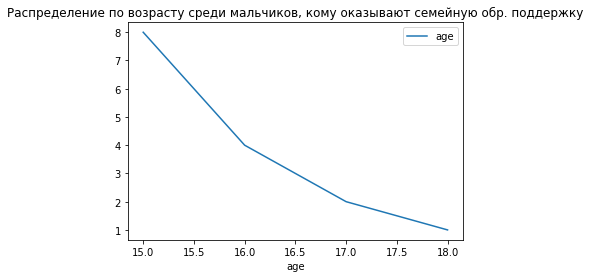

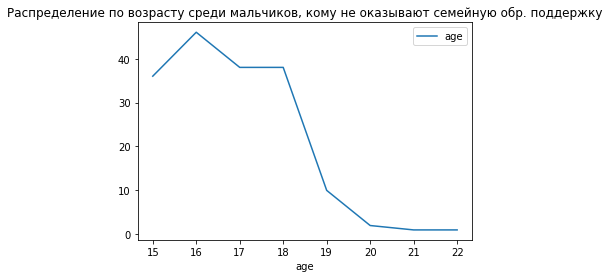

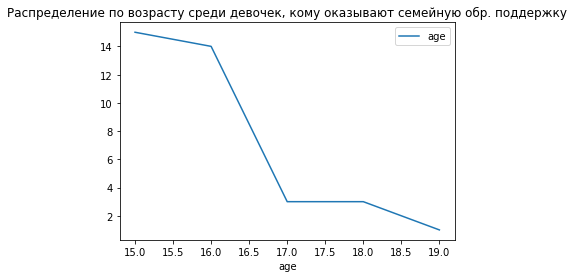

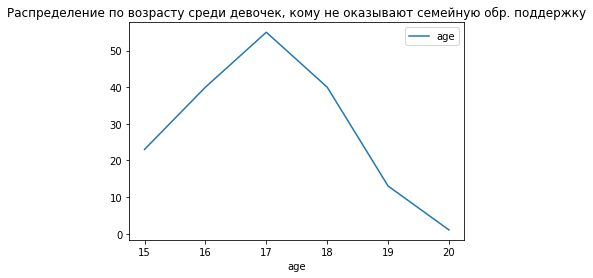

In [133]:
pd.DataFrame(stud[(stud.school_sup == 'yes') & (stud.sex == 'M')].groupby('age')['age'].count()).plot(
    title='Распределение по возрасту среди мальчиков, кому оказывают семейную обр. поддержку')
pd.DataFrame(stud[(stud.school_sup == 'no') & (stud.sex == 'M')].groupby('age')['age'].count()).plot(
    title='Распределение по возрасту среди мальчиков, кому не оказывают семейную обр. поддержку')
pd.DataFrame(stud[(stud.school_sup == 'yes') & (stud.sex == 'F')].groupby('age')['age'].count()).plot(
    title='Распределение по возрасту среди девочек, кому оказывают семейную обр. поддержку')
pd.DataFrame(stud[(stud.school_sup == 'no') & (stud.sex == 'F')].groupby('age')['age'].count()).plot(
    title='Распределение по возрасту среди девочек, кому не оказывают семейную обр. поддержку')

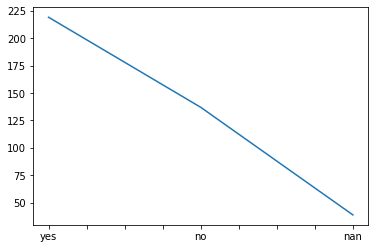

In [134]:
stud.fam_sup.value_counts().plot()

## Исходя из анализа, делаем вывод: 
## 1. Семейную поддержку больше всего оказывают мальчикам и девочкам 15 лет 
## 2. Чаще всего не оказывают поддержку девочкам 17 лет и мальчикам 16 лет
## 3. Всем остальным ученикам скорее всего  поддержку оказывают

#### Заполним пустые значения столбца исходя из наших выводов

In [135]:
# Список с индексами учеников 15 лет
fam_s_yes = stud.index[stud['age'] == 15].tolist()
# Список с индексами мальчиков 16 лет и девочек 17 лет
fam_s_no = stud.index[((stud['sex'] == 'M') & (stud['age'] == 16)) | (
    (stud['sex'] == 'F') & (stud['age'] == 17))].tolist()

### Заполним пустые значения исходя из выводов

In [136]:
for i, j in enumerate(stud.fam_sup):
    if j == 'nan':
        if i in fam_s_yes:
            stud.fam_sup[i] = 'yes'
        elif i in fam_s_no:
            stud.fam_sup[i] = 'no'
        else:
            stud.fam_sup[i] = 'yes'

<ipython-input-136-49c15a83f1de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.fam_sup[i] = 'yes'
<ipython-input-136-49c15a83f1de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.fam_sup[i] = 'no'
<ipython-input-136-49c15a83f1de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.fam_sup[i] = 'yes'


,fam_sup
yes,249
no,146


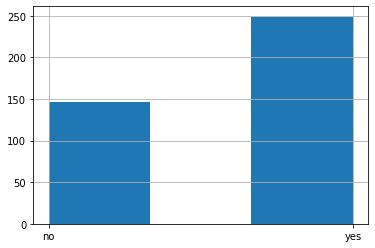

In [137]:
stud.fam_sup.hist(bins=3)
pd.DataFrame(stud.fam_sup.value_counts())

# paid 
###  Столбец строковый. Содержит пустые значения

In [138]:
stud.paid.unique()

array(['no', nan, 'yes'], dtype=object)

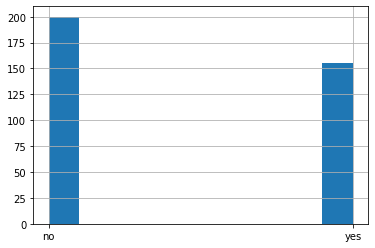

In [139]:
stud.paid.hist()

# Чаще не платят за доп. занятия по математике

In [140]:
stud.paid = stud.paid.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.paid.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.paid.value_counts() > 10).sum())
print("Уникальных значений:", stud.paid.nunique())
stud.loc[:, ['paid']].info()

,paid
no,200
yes,155
nan,40


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Предположим, что на наличие доп. платных занятий по математике влияет:
#### 1.Работа родителей
#### 2.Образование родителей
#### 3.Время на учебу помимо школы

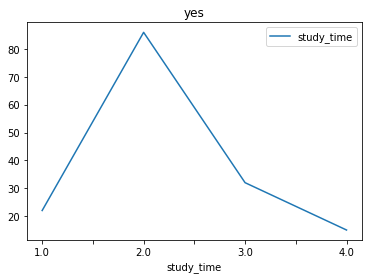

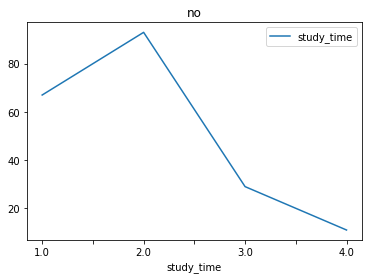

In [141]:
# Смотрим как влияет время на учебу помимо школы
pd.DataFrame(stud[stud.paid == 'yes'].groupby(
    'study_time')['study_time'].count()).plot(title='yes')
pd.DataFrame(stud[stud.paid == 'no'].groupby(
    'study_time')['study_time'].count()).plot(title='no')

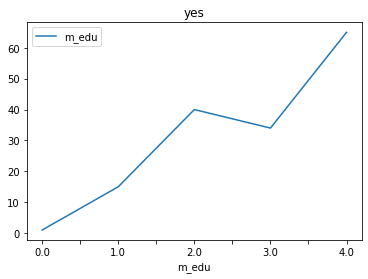

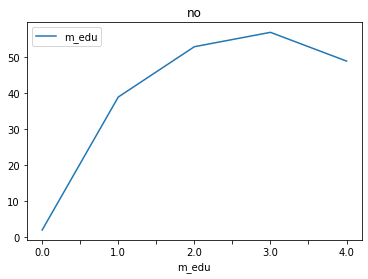

In [142]:
# Смотрим как влияет образование матери
pd.DataFrame(stud[stud.paid == 'yes'].groupby(
    'm_edu')['m_edu'].count()).plot(title='yes')
pd.DataFrame(stud[stud.paid == 'no'].groupby(
    'm_edu')['m_edu'].count()).plot(title='no')

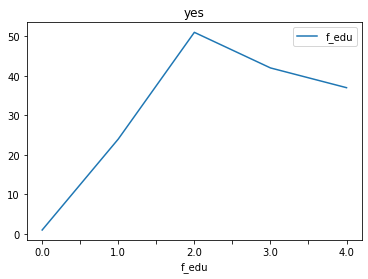

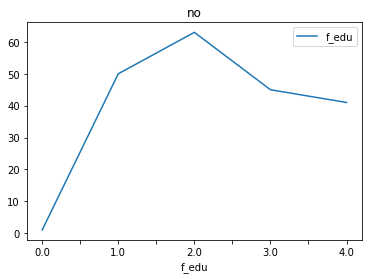

In [143]:
# Смотрим как влияет образование отца
pd.DataFrame(stud[stud.paid == 'yes'].groupby(
    'f_edu')['f_edu'].count()).plot(title='yes')
pd.DataFrame(stud[stud.paid == 'no'].groupby(
    'f_edu')['f_edu'].count()).plot(title='no')

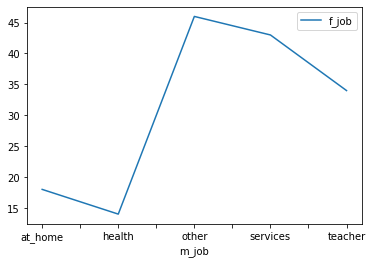

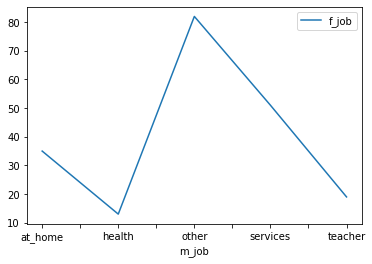

In [144]:
# Смотрим как влияет работа матери
pd.DataFrame(stud[stud.paid == 'yes'].groupby(
    'm_job')['f_job'].count()).plot()
pd.DataFrame(stud[stud.paid == 'no'].groupby(
    'm_job')['f_job'].count()).plot()

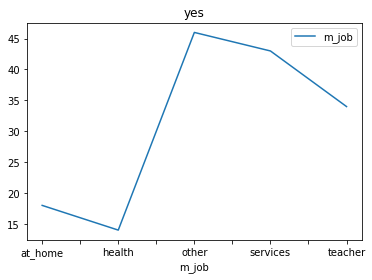

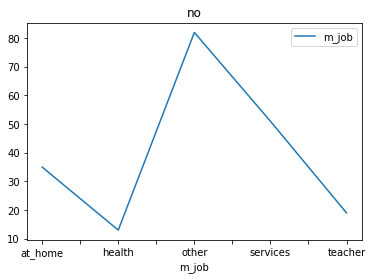

In [145]:
# Смотрим как влияет работа отца
pd.DataFrame(stud[stud.paid == 'yes'].groupby(
    'm_job')['m_job'].count()).plot(title='yes')
pd.DataFrame(stud[stud.paid == 'no'].groupby(
    'm_job')['m_job'].count()).plot(title='no')

# Выводы:
#### Чаще всего на платные занятия не ходят.
#### Cамые частые значения во всех гипотезах совпадают, кроме гипотезы об образовании матери.
#### Поэтому решим, что ученики, матери которых имеют высшее образование, наиболее вероятно посещают платные занятия по математике.
#### По остальным сказать не можем, поэтому им припишем наиболее часто встречающееся значение 'no'

In [146]:
# Список с индексами учеников, где у матери высшее образование
paid_yes_list = stud.index[stud.m_edu == '4.0'].tolist()

In [147]:
for i, j in enumerate(stud.paid):
    if j == 'nan':
        if i in paid_yes_list:
            stud.paid[i] = 'yes'
        else:
            stud.paid[i] = 'no'

<ipython-input-147-0b466059cb2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.paid[i] = 'no'
<ipython-input-147-0b466059cb2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.paid[i] = 'yes'


,paid
no,223
yes,172


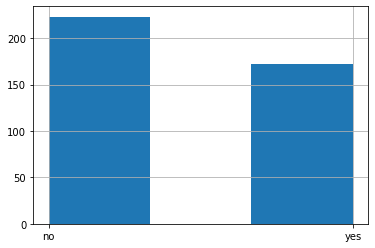

In [148]:
stud.paid.hist(bins=3)
pd.DataFrame(stud.paid.value_counts())

# activities
###  Столбец строковый. Содержит пустые значения

In [149]:
stud.activities.unique()

array(['no', 'yes', nan], dtype=object)

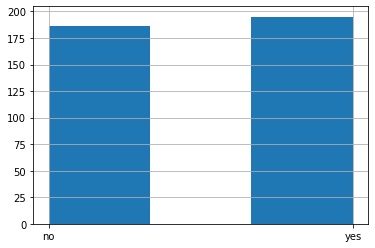

In [150]:
stud.activities.hist(bins=3)

In [151]:
stud.activities = stud.activities.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.activities.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.activities.value_counts() > 10).sum())
print("Уникальных значений:", stud.activities.nunique())
stud.loc[:, ['activities']].info()

,activities
yes,195
no,186
nan,14


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### Наблюдаем, что количество учеников заниющихся внеучебными занятиями и нет, примерно одинаково
### Логически делаем вывод, что семейная обр. поддержка (fam_sup), дополнительная обр. поддержка(school_sup) и доп. платные занятия(paid) точно являются доп. внеучебными занятиями. Для остальных учеников заполним значения случайно.


In [152]:
activity_yes_list = stud.index[(stud.fam_sup == 'yes') | (
    stud.school_sup == 'yes') | (stud.paid == 'yes')].tolist()

In [153]:
for i, j in enumerate(stud.activities):
    if j == 'nan':
        if i in activity_yes_list:
            stud.activities[i] = 'yes'
        else:
            stud.activities[i] = random.choice(['yes', 'no'])

<ipython-input-153-c73c4dd56101>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.activities[i] = 'yes'
<ipython-input-153-c73c4dd56101>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.activities[i] = random.choice(['yes', 'no'])


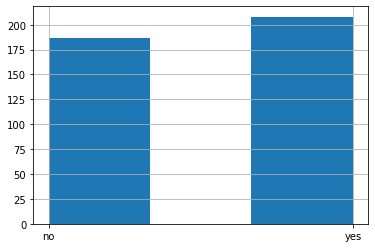

In [154]:
stud.activities.hist(bins=3)

# nursery

In [155]:
stud.nursery.unique()

array(['yes', 'no', nan], dtype=object)

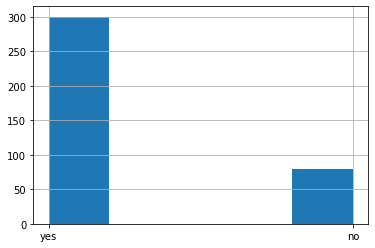

In [156]:
stud.nursery.hist(bins=5)

In [157]:
stud.nursery = stud.nursery.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.nursery.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.nursery.value_counts() > 10).sum())
print("Уникальных значений:", stud.nursery.nunique())
stud.loc[:, ['nursery']].info()

,nursery
yes,300
no,79
nan,16


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Большее количество учеников посещало детский сад
### Возможно есть закономерности. Предположим, что этот показатель зависит от работы , образования родителей или размера семьи

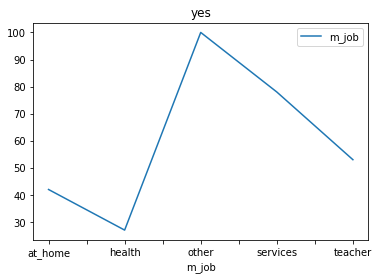

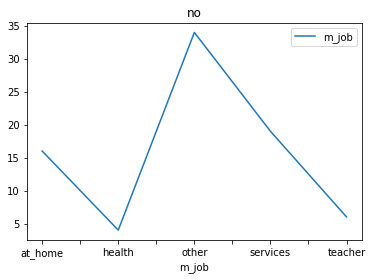

In [158]:
pd.DataFrame(stud[stud.nursery == 'yes'].groupby(
    'm_job')['m_job'].count()).plot(title='yes')
pd.DataFrame(stud[stud.nursery == 'no'].groupby(
    'm_job')['m_job'].count()).plot(title='no')

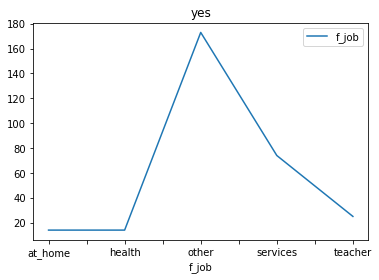

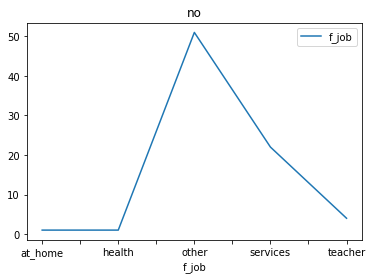

In [159]:
pd.DataFrame(stud[stud.nursery == 'yes'].groupby(
    'f_job')['f_job'].count()).plot(title='yes')
pd.DataFrame(stud[stud.nursery == 'no'].groupby(
    'f_job')['f_job'].count()).plot(title='no')

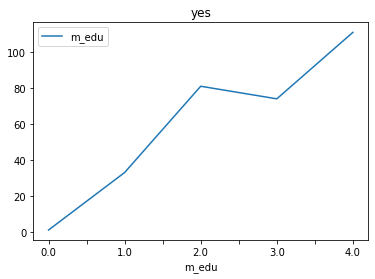

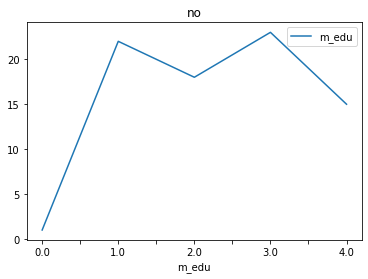

In [160]:
pd.DataFrame(stud[stud.nursery == 'yes'].groupby(
    'm_edu')['m_edu'].count()).plot(title='yes')
pd.DataFrame(stud[stud.nursery == 'no'].groupby(
    'm_edu')['m_edu'].count()).plot(title='no')

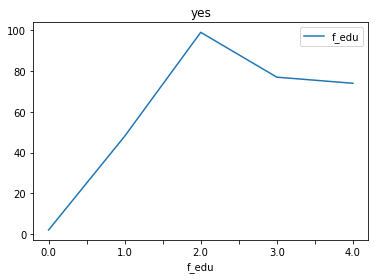

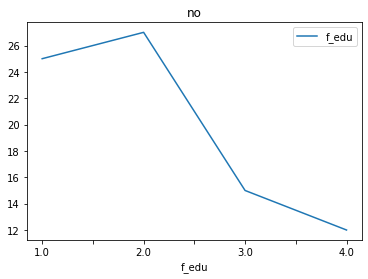

In [161]:
pd.DataFrame(stud[stud.nursery == 'yes'].groupby(
    'f_edu')['f_edu'].count()).plot(title='yes')
pd.DataFrame(stud[stud.nursery == 'no'].groupby(
    'f_edu')['f_edu'].count()).plot(title='no')

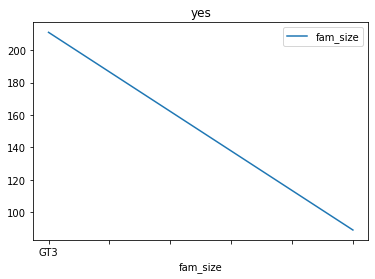

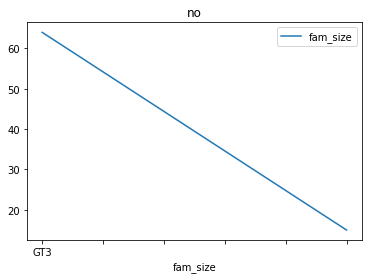

In [162]:
pd.DataFrame(stud[stud.nursery == 'yes'].groupby(
    'fam_size')['fam_size'].count()).plot(title='yes')
pd.DataFrame(stud[stud.nursery == 'no'].groupby(
    'fam_size')['fam_size'].count()).plot(title='no')

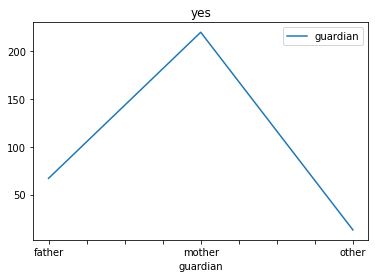

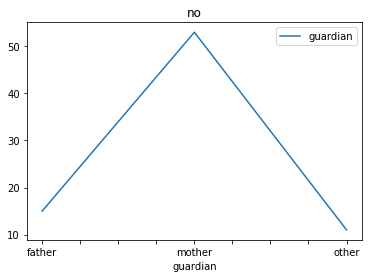

In [163]:
pd.DataFrame(stud[stud.nursery == 'yes'].groupby(
    'guardian')['guardian'].count()).plot(title='yes')
pd.DataFrame(stud[stud.nursery == 'no'].groupby(
    'guardian')['guardian'].count()).plot(title='no')

### Выводы:
### 1. Ученики, у матерей которых начальное или среднее образование, скорее всего не посещали детский сад
### 2. Ученики, у отцов которых неполное школьное образование, скорее всего не посещали детский сад
### 3. Для остальных учеников закономерностей не обнаружено, поэтому их  пустые значения в столбце заполним наиболее часто встречающимся 'yes'

In [164]:
nurse_no_list = stud.index[(stud.m_edu == '1.0') | (
    stud.m_edu == '3.0') | (stud.f_edu == '2.0')].tolist()

In [165]:
for i, j in enumerate(stud.nursery):
    if j == 'nan':
        if i in nurse_no_list:
            stud.nursery[i] = 'no'
        else:
            stud.nursery[i] = 'yes'

<ipython-input-165-ce1449361ad1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.nursery[i] = 'no'
<ipython-input-165-ce1449361ad1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.nursery[i] = 'yes'


,nursery
yes,305
no,90


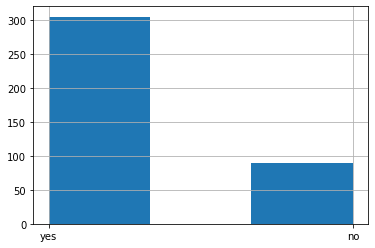

In [166]:
stud.nursery.hist(bins=3)
pd.DataFrame(stud.nursery.value_counts())

# study_time_granular

In [167]:
stud.study_time_granular.unique()

array([ -6.,  -9.,  -3.,  nan, -12.])

In [168]:
stud.study_time_granular = stud.study_time_granular.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.study_time_granular.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.study_time_granular.value_counts() > 10).sum())
print("Уникальных значений:", stud.study_time_granular.nunique())
stud.loc[:, ['study_time_granular']].info()

,study_time_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27
nan,7


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   study_time_granular  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


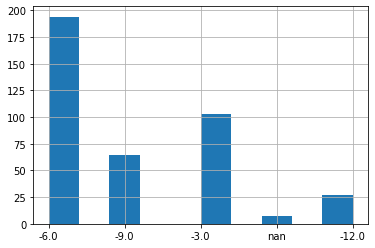

In [169]:
stud.study_time_granular.hist()

In [170]:
stud.study_time_granular.median()

-6.0

In [171]:
# Заполним пустые значения медиальным значением "-6.0"

In [172]:
stud.study_time_granular = stud.study_time_granular.astype(str).apply(
    lambda x: '-6.0' if x.strip() == 'nan' else x)

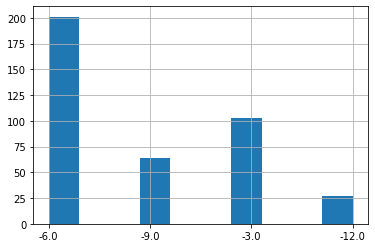

In [173]:
stud.study_time_granular.hist()

# higher

In [174]:
stud.higher.unique()

array(['yes', nan, 'no'], dtype=object)

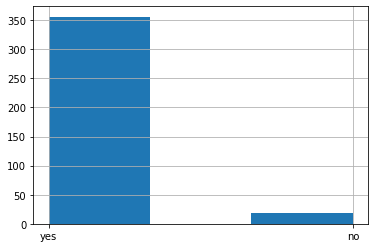

In [175]:
stud.higher.hist(bins=3)

In [176]:
stud.higher = stud.higher.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.higher.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.higher.value_counts() > 10).sum())
print("Уникальных значений:", stud.higher.nunique())
stud.loc[:, ['higher']].info()

,higher
yes,356
nan,20
no,19


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# Большее количество учеников хотят получить высшее образование. Предположим, что на этот показатель влияет образование и работа родителей. Особенно матери

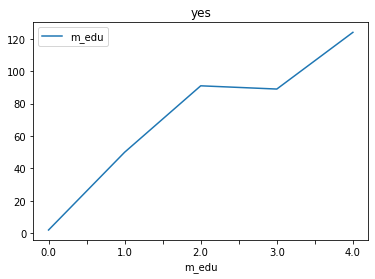

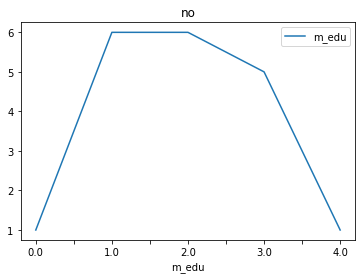

In [177]:
pd.DataFrame(stud[stud.higher == 'yes'].groupby(
    'm_edu')['m_edu'].count()).plot(title='yes')
pd.DataFrame(stud[stud.higher == 'no'].groupby(
    'm_edu')['m_edu'].count()).plot(title='no')

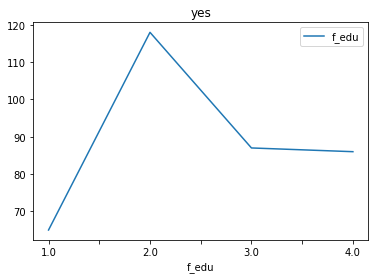

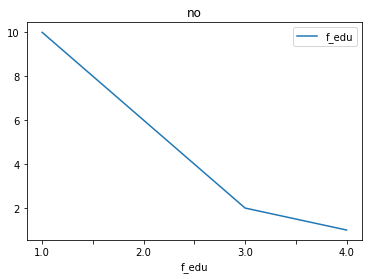

In [178]:
pd.DataFrame(stud[stud.higher == 'yes'].groupby(
    'f_edu')['f_edu'].count()).plot(title='yes')
pd.DataFrame(stud[stud.higher == 'no'].groupby(
    'f_edu')['f_edu'].count()).plot(title='no')

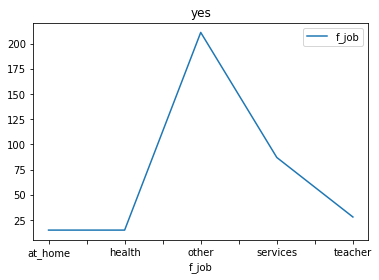

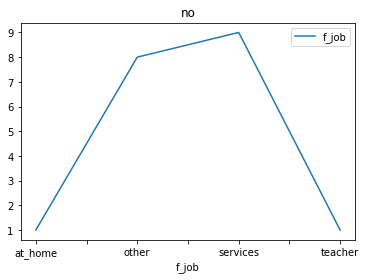

In [179]:
pd.DataFrame(stud[stud.higher == 'yes'].groupby(
    'f_job')['f_job'].count()).plot(title='yes')
pd.DataFrame(stud[stud.higher == 'no'].groupby(
    'f_job')['f_job'].count()).plot(title='no')

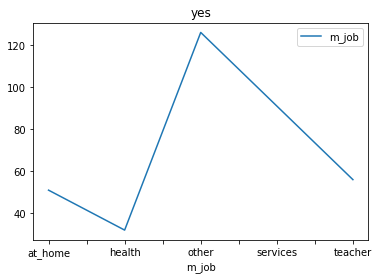

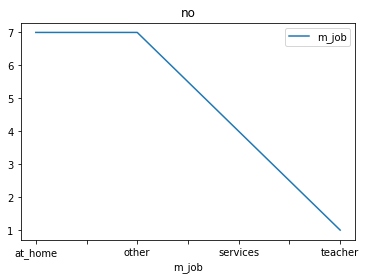

In [180]:
pd.DataFrame(stud[stud.higher == 'yes'].groupby(
    'm_job')['m_job'].count()).plot(title='yes')
pd.DataFrame(stud[stud.higher == 'no'].groupby(
    'm_job')['m_job'].count()).plot(title='no')

# Вывод:
#### 1.Ученики, матери которых не работают или занимаются('other'), имеют начальное или неполное школьное образование,  чаще всего не хотят получить высшее образование
#### 2. Ученики, отцы которых работают на гос. службе или имеют начальное образование чаще всего не хотят получить высшее образование
#### 3. Для остальных  учеников заполним пустые поля наиболее часто встречающимся значением 'yes'


In [181]:
no_higher_list = stud.index[(stud.m_job == 'at_home') | (stud.m_job == 'other') | (stud.m_edu == '1.0') | (
    stud.m_edu == '2.0') | (stud.f_job == 'services') | (stud.f_edu == '1.0')].tolist()

In [182]:
for i, j in enumerate(stud.higher):
    if j == 'nan':
        if i in no_higher_list:
            stud.higher[i] = 'no'
        else:
            stud.higher[i] = 'yes'

<ipython-input-182-455f183a2052>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.higher[i] = 'no'
<ipython-input-182-455f183a2052>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.higher[i] = 'yes'


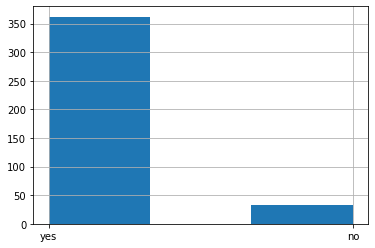

In [183]:
stud.higher.hist(bins=3)

In [184]:
stud.higher.value_counts()

yes    362
no      33
Name: higher, dtype: int64

# internet 

In [185]:
stud.internet.unique()

array([nan, 'yes', 'no'], dtype=object)

,internet
yes,305
no,56


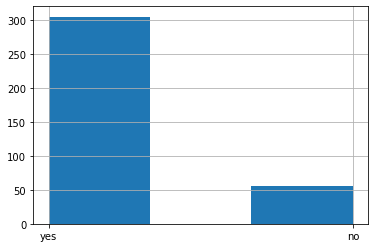

In [186]:
stud.internet.hist(bins=3)
pd.DataFrame(stud.internet.value_counts())

In [187]:
stud.internet = stud.internet.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.internet.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.internet.value_counts() > 10).sum())
print("Уникальных значений:", stud.internet.nunique())
stud.loc[:, ['internet']].info()

,internet
yes,305
no,56
nan,34


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# Большее кол-во учеников имеют интернет. Предположим, что на это влияет то, где живет ученик

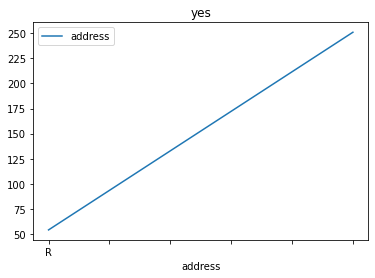

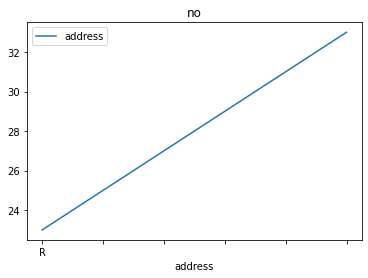

In [188]:
pd.DataFrame(stud[stud.internet == 'yes'].groupby(
    'address')['address'].count()).plot(title='yes')
pd.DataFrame(stud[stud.internet == 'no'].groupby(
    'address')['address'].count()).plot(title='no')

### Гипотеза не подтверждена, логических предположений нет. Заполним пустые значения наиболее часто встречающимися

In [189]:
stud.internet = stud.internet.astype(str).apply(
    lambda x: 'yes' if x.strip() == 'nan' else x)

In [190]:
pd.DataFrame(stud.internet.value_counts())

,internet
yes,339
no,56


# romantic 

In [191]:
stud.romantic.unique()

array(['no', nan, 'yes'], dtype=object)

In [192]:
stud.romantic = stud.romantic.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.romantic.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.romantic.value_counts() > 10).sum())
print("Уникальных значений:", stud.romantic.nunique())
stud.loc[:, ['romantic']].info()

,romantic
no,240
yes,124
nan,31


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


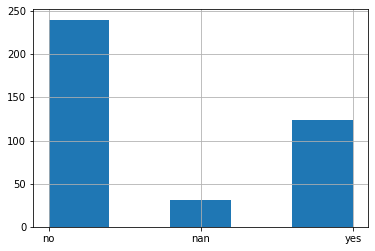

In [193]:
stud.romantic.hist(bins=5)

## Предположим, что на этот показатель романтических отношений может влиять возраст и пол ученика

## Ученики

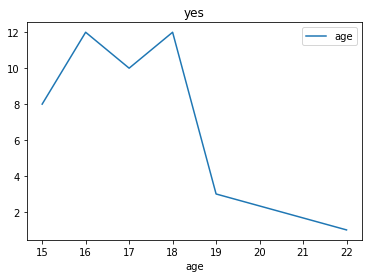

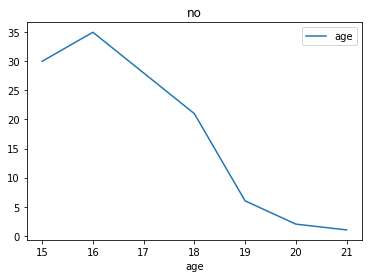

In [194]:
pd.DataFrame(stud[(stud.romantic == 'yes') & (stud.sex == 'M')].groupby(
    'age')['age'].count()).plot(title='yes')
pd.DataFrame(stud[(stud.romantic == 'no') & (stud.sex == 'M')].groupby(
    'age')['age'].count()).plot(title='no')

## Ученицы

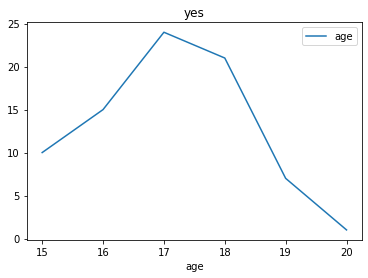

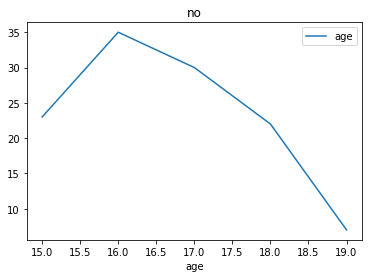

In [195]:
pd.DataFrame(stud[(stud.romantic == 'yes') & (stud.sex == 'F')].groupby(
    'age')['age'].count()).plot(title='yes')
pd.DataFrame(stud[(stud.romantic == 'no') & (stud.sex == 'F')].groupby(
    'age')['age'].count()).plot(title='no')

# Выводы:
   ### 1. Ученицы чаще всего в отношениях в возрасте 17 лет 
   ### 2. Ученики чаще всего в отношениях в возрасте  18 лет (16 летние не учитываются, потому то вершины совпадают)
   ### 3. Пустые значения в столбце для остальных  учащихся заменим наиболее часто встречающимся значением 'no'
    

In [196]:
yes_romantic_list = stud.index[((stud.sex == 'F') & (stud.age == 17)) | (
    (stud.sex == 'M') & (stud.age == 18))].tolist()

In [197]:
for i, j in enumerate(stud.romantic):
    if j == 'nan':
        if i in yes_romantic_list:
            stud.romantic[i] = 'yes'
        else:
            stud.romantic[i] = 'no'

<ipython-input-197-c88e16ddfa64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.romantic[i] = 'no'
<ipython-input-197-c88e16ddfa64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.romantic[i] = 'yes'


,romantic
no,261
yes,134


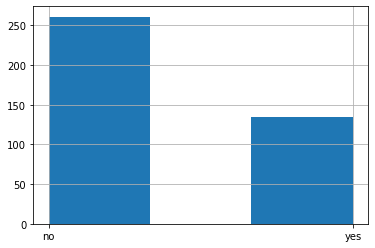

In [198]:
stud.romantic.hist(bins=3)
pd.DataFrame(stud.romantic.value_counts())

# fam_rel

In [199]:
stud.fam_rel.unique()

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

In [200]:
stud.fam_rel = stud.fam_rel.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.fam_rel.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.fam_rel.value_counts() > 10).sum())
print("Уникальных значений:", stud.fam_rel.nunique())
stud.loc[:, ['fam_rel']].info()

,fam_rel
4.0,182
5.0,99
3.0,62
nan,27
2.0,17
1.0,7
-1.0,1


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_rel  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### Среди значений есть "-1". Оно встречается один раз, скорее всего опечатка. Исправим на "1"

In [201]:
stud.fam_rel = stud.fam_rel.astype(str).apply(
    lambda x: '1.0' if x.strip() == '-1.0' else x)

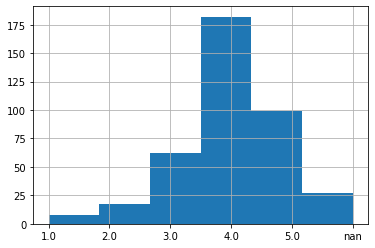

In [202]:
(stud.fam_rel.sort_values().hist(bins=6))

In [203]:
stud.fam_rel.median()

4.0

## Заменим пустые значения на медиальное значение - хорошие семейные отношения

In [204]:
stud.fam_rel = stud.fam_rel.astype(str).apply(
    lambda x: '4.0' if x.strip() == 'nan' else x)

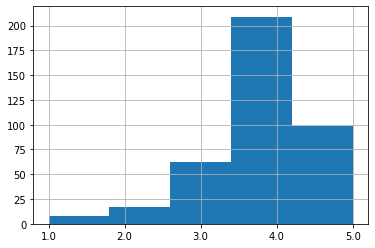

In [205]:
stud.fam_rel.sort_values().hist(bins=5)

# free_time

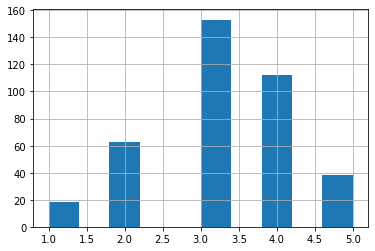

In [206]:
stud.free_time.hist()

In [207]:
pd.DataFrame(stud.free_time.value_counts())

,free_time
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [208]:
stud.free_time = stud.free_time.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.free_time.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.free_time.value_counts() > 10).sum())
print("Уникальных значений:", stud.free_time.nunique())
stud.loc[:, ['free_time']].info()

,free_time
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
nan,11


Значений, встретившихся в столбце более 10 раз: 6
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   free_time  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [209]:
stud.free_time.median()

3.0

### Заменим пустые значения на медиальное значение - свободного времени достаточно "3.0"

In [210]:
stud.free_time = stud.free_time.astype(str).apply(
    lambda x: '3.0' if x.strip() == 'nan' else x)

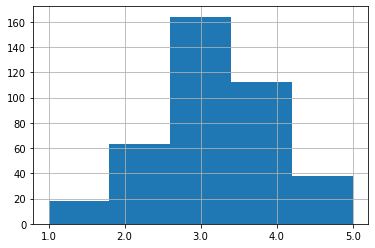

In [211]:
stud.free_time.sort_values().hist(bins=5)

# go_out

In [212]:
stud.go_out.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

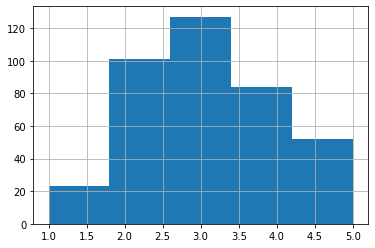

In [213]:
stud.go_out.hist(bins=5)

In [214]:
stud.go_out = stud.go_out.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.go_out.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.go_out.value_counts() > 10).sum())
print("Уникальных значений:", stud.go_out.nunique())
stud.loc[:, ['go_out']].info()

,go_out
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
nan,8


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   go_out  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [215]:
stud.go_out.median()

3.0

## Заменим пустые значения на медиальное значение - достаточное проведение времени с друзьями "3.0"

In [216]:
stud.go_out = stud.go_out.astype(str).apply(
    lambda x: '3.0' if x.strip() == 'nan' else x)

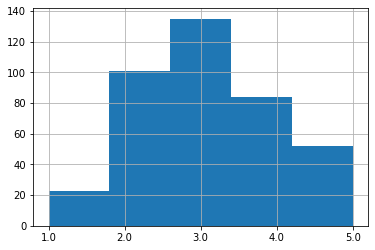

In [217]:
stud.go_out.sort_values().hist(bins=5)

# health 

In [218]:
stud.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

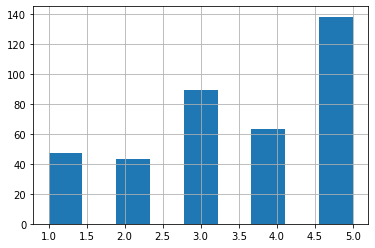

In [219]:
stud.health.sort_values().hist(bins=9)

In [220]:
stud.health = stud.health.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.health.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.health.value_counts() > 10).sum())
print("Уникальных значений:", stud.health.nunique())
stud.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
nan,15


Значений, встретившихся в столбце более 10 раз: 6
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   health  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [221]:
stud.health.median()

4.0

## Заменим пустые значения на медиальное значение - хорошее здоровье "4.0"

In [222]:
stud.health = stud.health.astype(str).apply(
    lambda x: '4.0' if x.strip() == 'nan' else x)

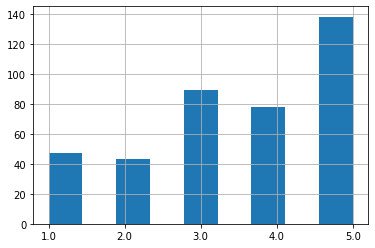

In [223]:
stud.health.sort_values().hist(bins=9)

# absences 

In [224]:
stud.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

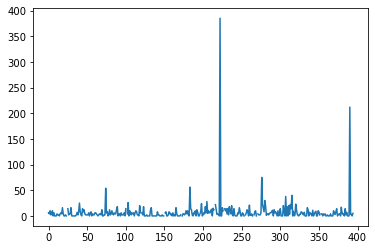

In [225]:
stud.absences.plot()

In [226]:
stud.absences = stud.absences.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.absences.value_counts() > 10).sum())
print("Уникальных значений:", stud.absences.nunique())
stud.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
nan,12
12.0,12
3.0,8


Значений, встретившихся в столбце более 10 раз: 9
Уникальных значений: 37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   absences  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [227]:
stud.absences.median()

4.0

## Вывод: есть выбросы "212" и "385", которые удалим. Все пустые значения заменим на медиальное значение - "4"

In [228]:
stud = stud.query("absences not in ['212.0','385.0']")

In [229]:
stud.absences = stud.absences.astype(str).apply(
    lambda x: '4.0' if x.strip() == 'nan' else x)

In [230]:
stud['absences'] = stud['absences'].astype('float64')

In [231]:
stud.absences.value_counts()

0.0     111
4.0      65
2.0      60
6.0      31
8.0      21
10.0     17
14.0     12
12.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
1.0       3
22.0      3
9.0       3
15.0      2
13.0      2
11.0      2
54.0      1
25.0      1
17.0      1
26.0      1
56.0      1
23.0      1
28.0      1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
24.0      1
Name: absences, dtype: int64

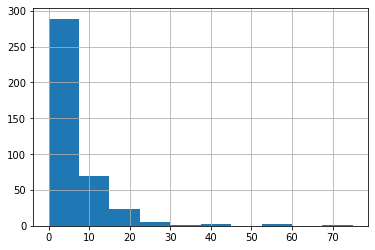

In [232]:
stud.absences.hist()

# score

In [233]:
stud.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

In [234]:
stud.score = stud.score.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud.score.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.score.value_counts() > 10).sum())
print("Уникальных значений:", stud.score.nunique())
stud.loc[:, ['score']].info()

,score
50.0,54
55.0,46
0.0,37
75.0,33
60.0,31
65.0,31
40.0,31
70.0,27
45.0,26
80.0,16


Значений, встретившихся в столбце более 10 раз: 12
Уникальных значений: 19
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


### Столбец числовой, содержит пропуски. Мы  их  удалим а не заполним, так как заполнением можем сместить распределение.

In [235]:
stud = stud.query("score not in ['nan']")

In [236]:
pd.DataFrame(stud.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
40.0,31
65.0,31
60.0,31
70.0,27
45.0,26
80.0,16


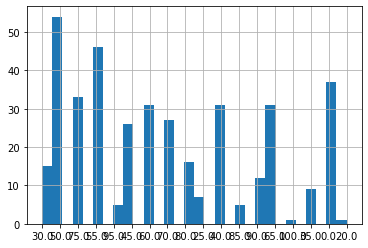

In [237]:
stud.score.hist(bins=30)

In [238]:
# После заполнения пустых значений преобразуем столбцы в числовой формат  
stud['score'] = stud['score'].astype('float64')
stud['age'] = stud['age'].astype('float64')
stud['m_edu'] = stud['m_edu'].astype('float64')
stud['f_edu'] = stud['f_edu'].astype('float64')
stud['travel_time'] = stud['travel_time'].astype('float64')
stud['study_time'] = stud['study_time'].astype('float64')
stud['failures'] = stud['failures'].astype('float64')
stud['fam_rel'] = stud['fam_rel'].astype('float64')
stud['free_time'] = stud['free_time'].astype('float64')
stud['go_out'] = stud['go_out'].astype('float64')
stud['health'] = stud['health'].astype('float64')
stud['absences'] = stud['absences'].astype('float64')
stud['study_time_granular'] = stud['study_time_granular'].astype('float64')

# Корреляционный анализ 

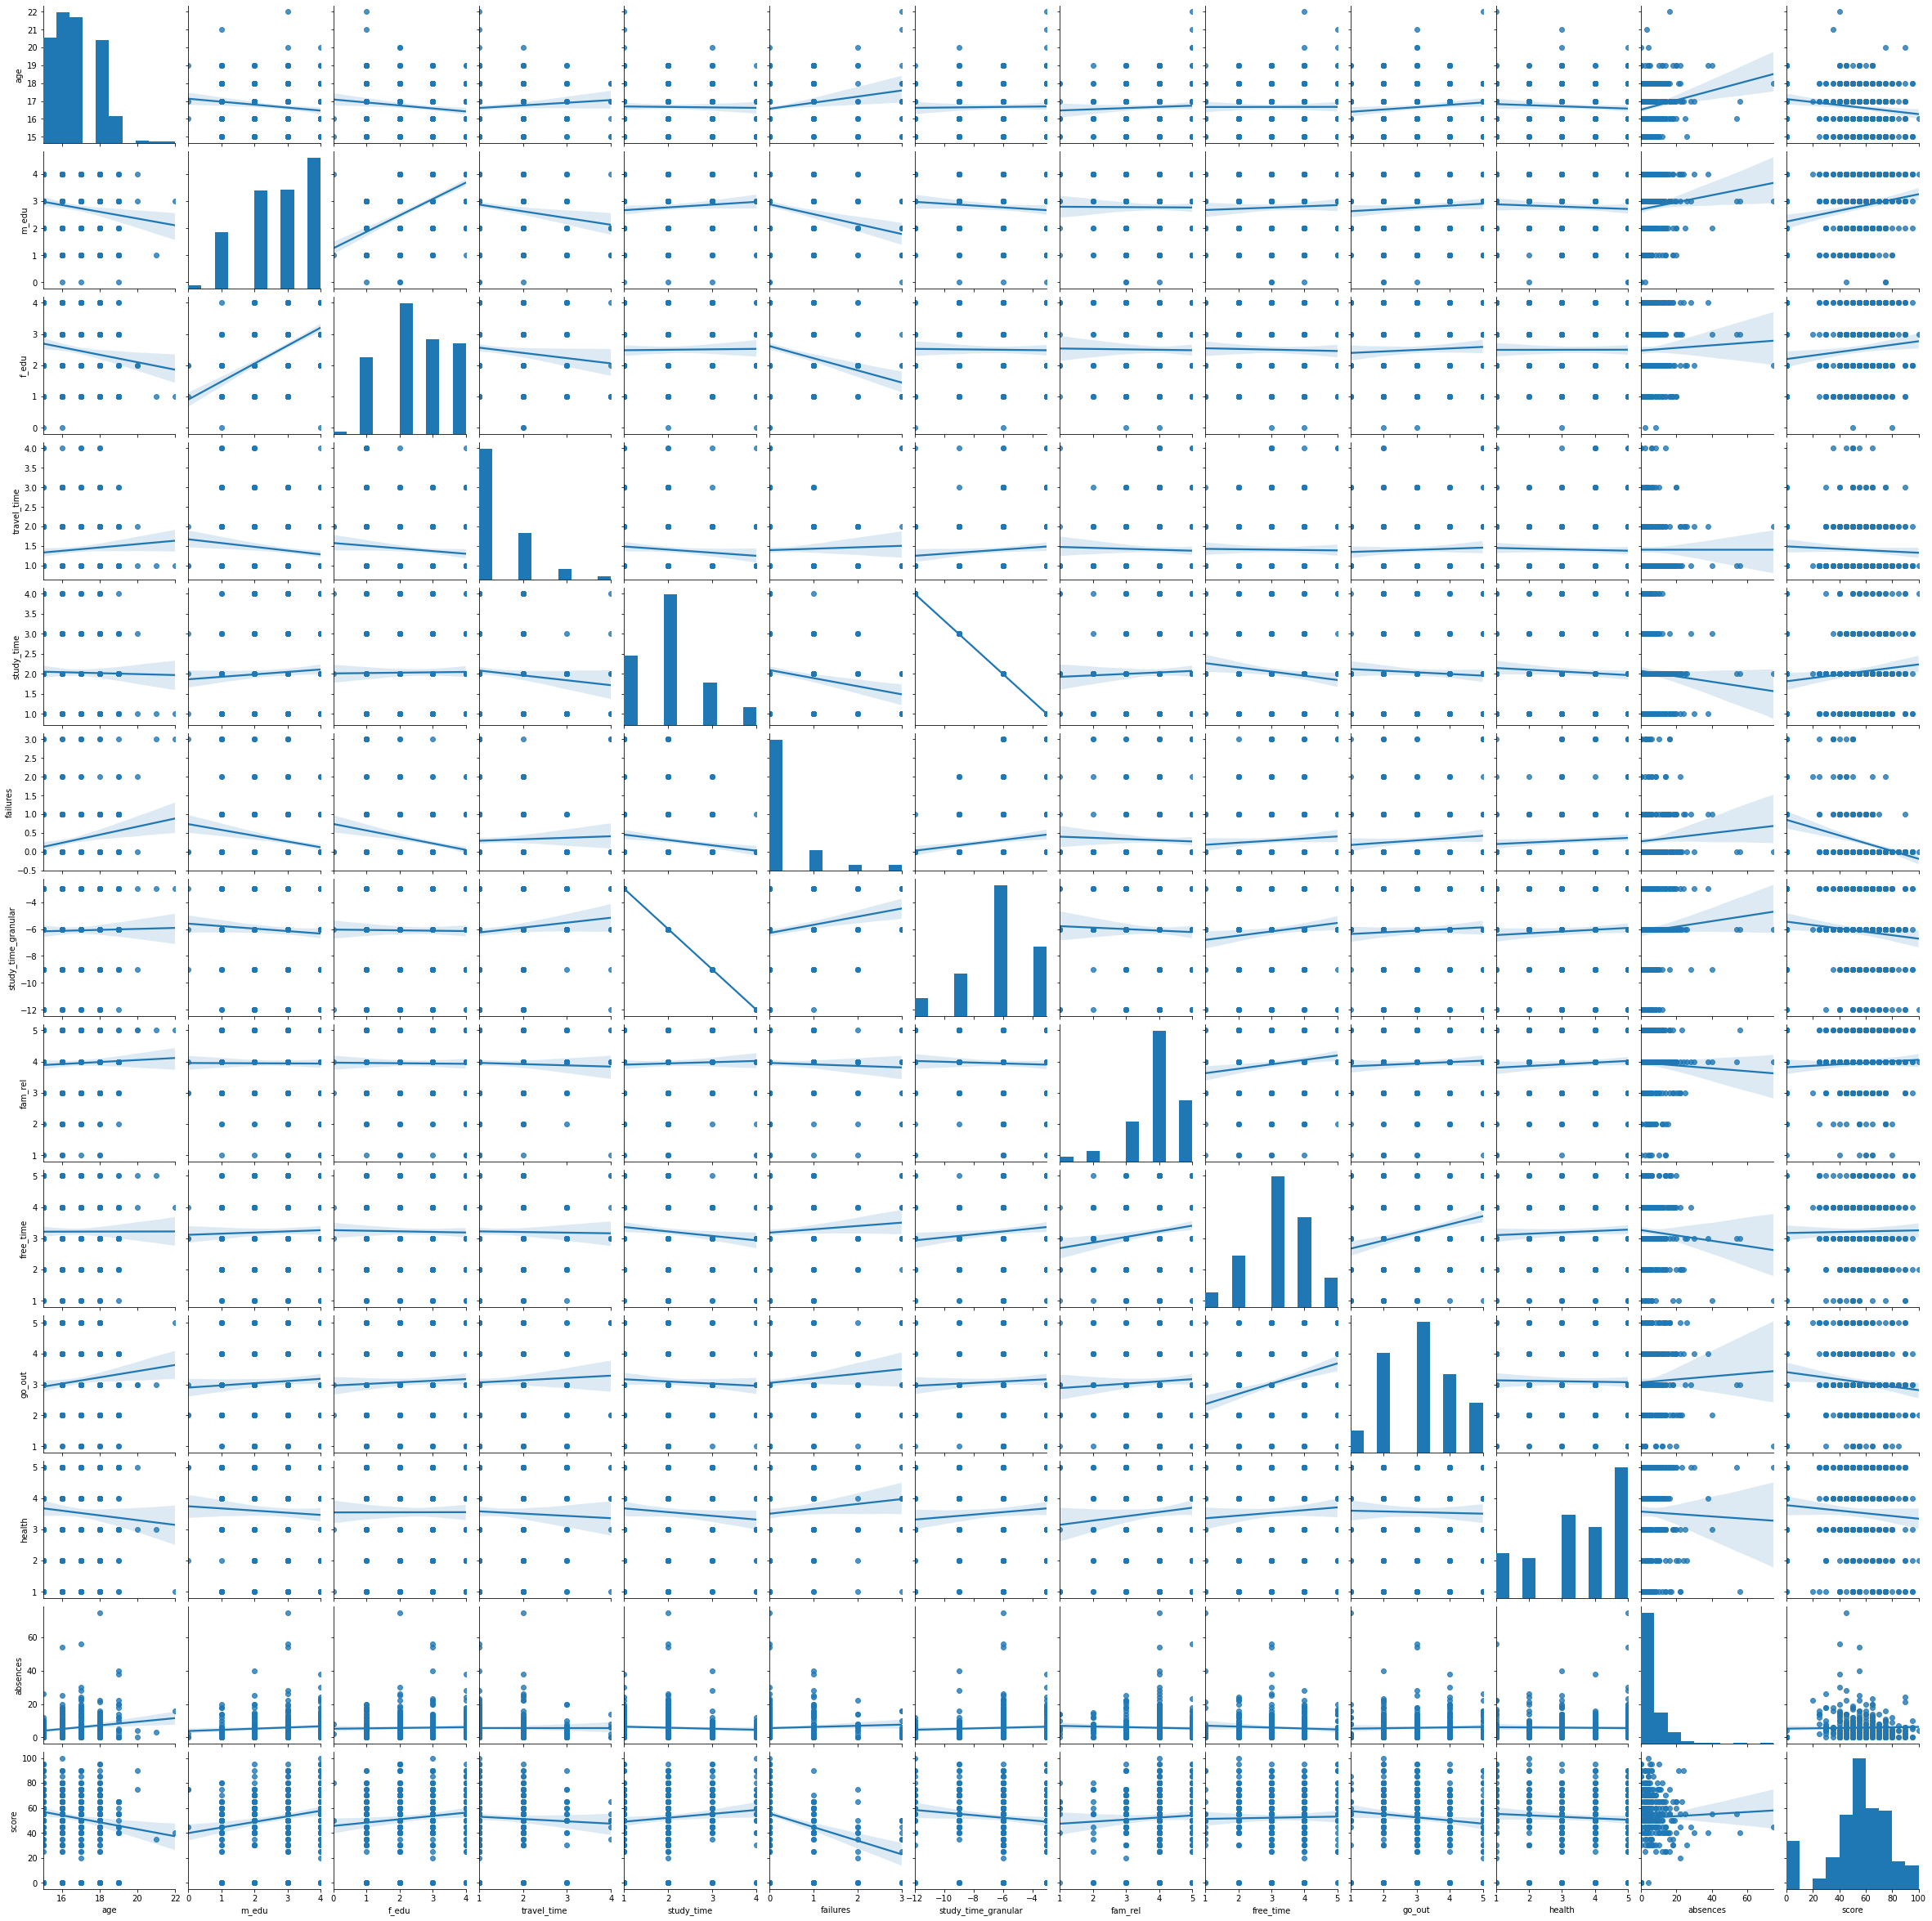

In [239]:
sns.pairplot(stud, kind='reg')

In [240]:
stud.corr()

,age,m_edu,f_edu,travel_time,study_time,failures,study_time_granular,fam_rel,free_time,go_out,health,absences,score
age,1.000000,-0.144104,-0.141431,0.080071,-0.017954,0.192816,0.017954,0.046539,0.001401,0.114612,-0.069156,0.169789,-0.153488
m_edu,-0.144104,1.000000,0.590471,-0.155119,0.079460,-0.238225,-0.079460,-0.005457,0.040834,0.069751,-0.054646,0.095674,0.212650
f_edu,-0.141431,0.590471,1.000000,-0.107416,0.011731,-0.259510,-0.011731,-0.011425,-0.020312,0.050007,0.001449,0.031444,0.123111
travel_time,0.080071,-0.155119,-0.107416,1.000000,-0.098450,0.038437,0.098450,-0.031054,-0.014313,0.045023,-0.036004,-0.000089,-0.055020
study_time,-0.017954,0.079460,0.011731,-0.098450,1.000000,-0.170471,-1.000000,0.038154,-0.122410,-0.053970,-0.072823,-0.064100,0.114737
failures,0.192816,-0.238225,-0.259510,0.038437,-0.170471,1.000000,0.170471,-0.038989,0.077106,0.095156,0.080346,0.061911,-0.337138
study_time_granular,0.017954,-0.079460,-0.011731,0.098450,-1.000000,0.170471,1.000000,-0.038154,0.122410,0.053970,0.072823,0.064100,-0.114737
fam_rel,0.046539,-0.005457,-0.011425,-0.031054,0.038154,-0.038989,-0.038154,1.000000,0.159923,0.056925,0.086293,-0.042322,0.062745
free_time,0.001401,0.040834,-0.020312,-0.014313,-0.122410,0.077106,0.122410,0.159923,1.000000,0.292406,0.062246,-0.069754,0.019910
go_out,0.114612,0.069751,0.050007,0.045023,-0.053970,0.095156,0.053970,0.056925,0.292406,1.000000,-0.019172,0.035231,-0.121098


### Определили коэффициент корреляции между показателями:
#### 1. "study_time" и "study_time_granular" обратноскореллированы, один из них удалим. Пусть это будет "study_time_granular"

#### 2. Показатель score сильнее всего скореллирован с m_edu, слабее с f_edu и study_time
#### 3. Обратная зависимотсь score от возраста age и свободного времени go_out


In [241]:
stud.drop(['study_time_granular'], inplace=True, axis=1)

In [242]:
stud

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18.0,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,no,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


# Анализ номинативных переменных

In [243]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

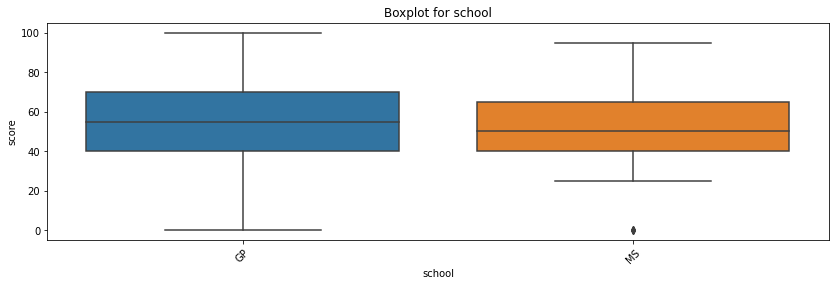

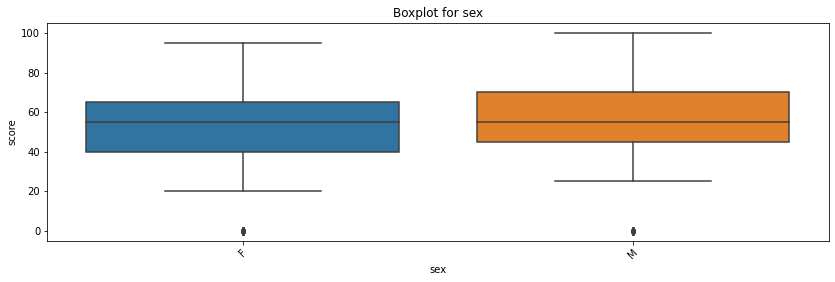

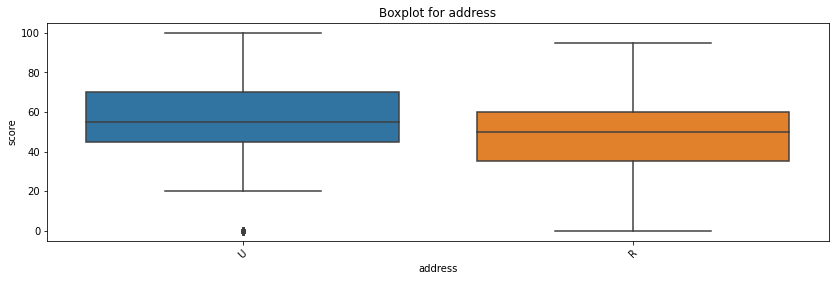

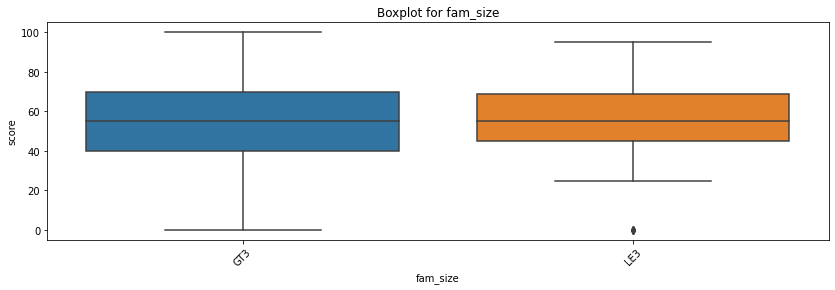

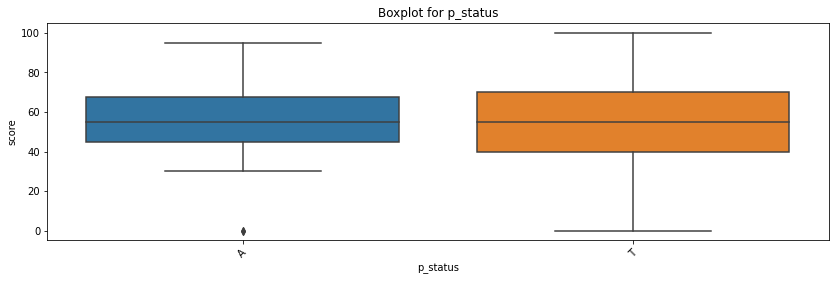

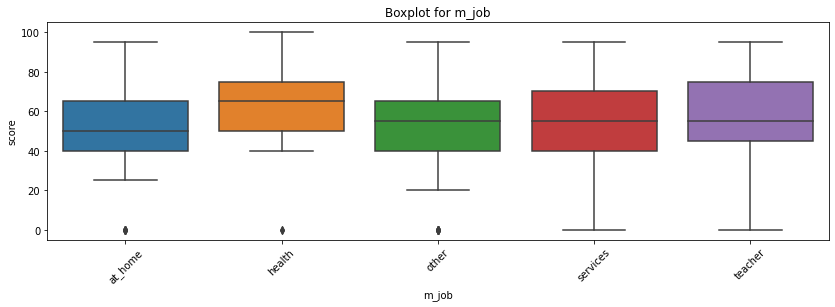

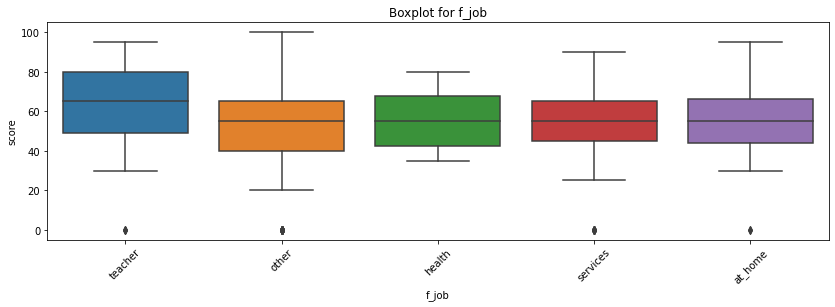

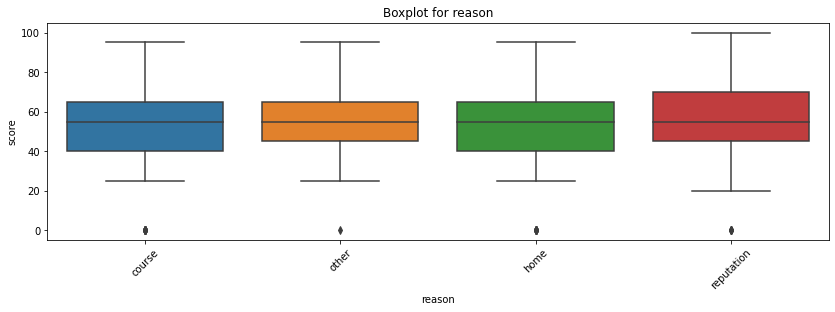

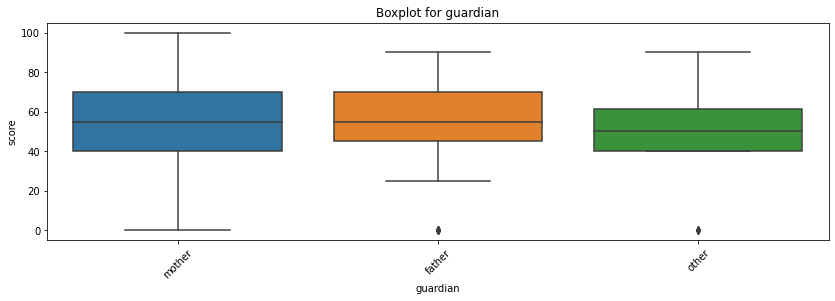

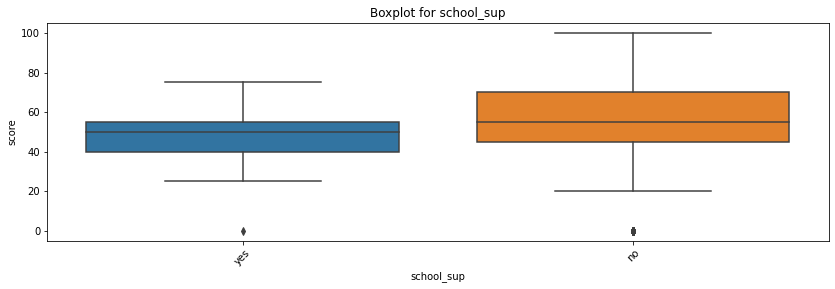

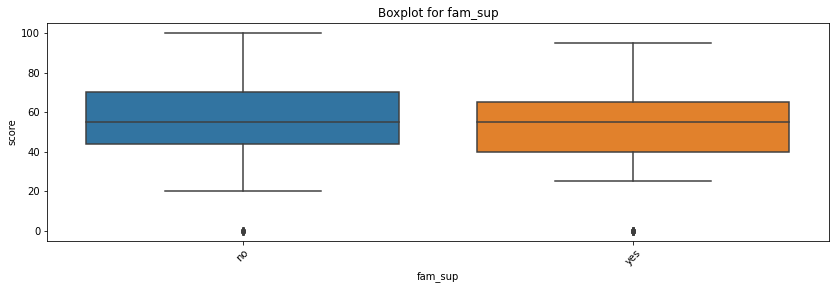

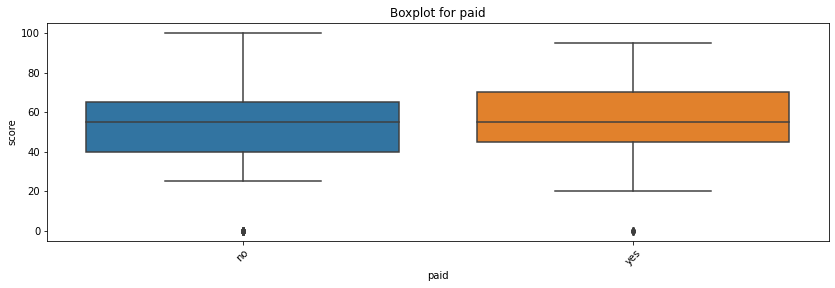

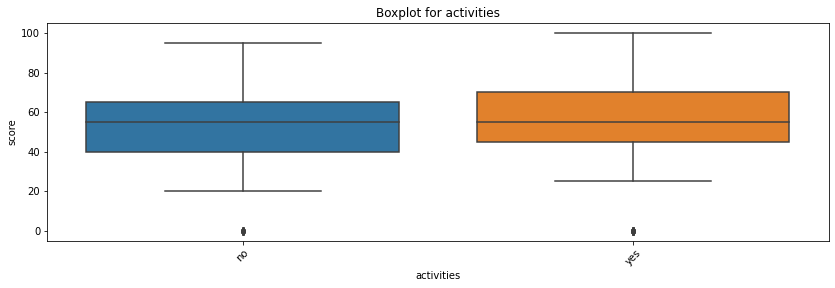

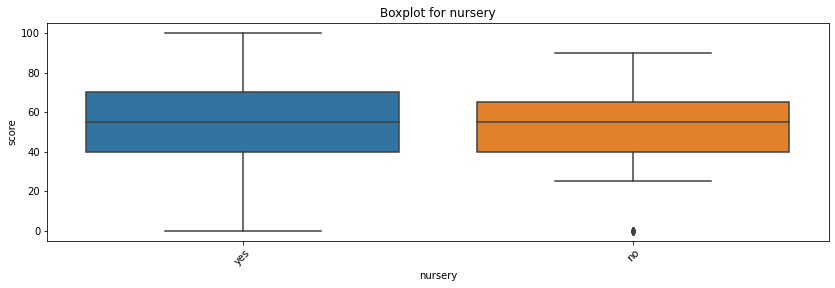

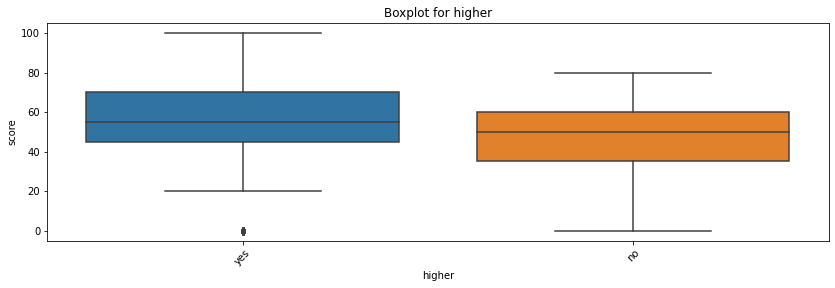

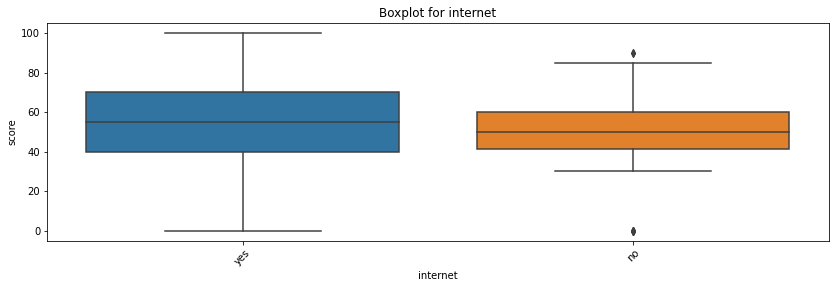

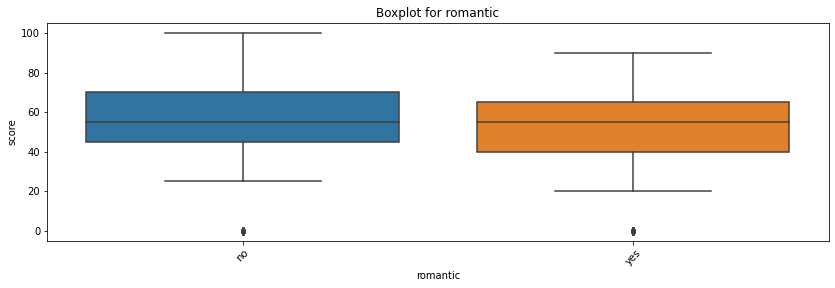

In [244]:
for col in ['school', 'sex',  'address', 'fam_size', 'p_status',
            'm_job', 'f_job', 'reason', 'guardian',
            'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic',
            ]:
    get_boxplot(col)

In [245]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [246]:
for col in ['school', 'sex',  'address', 'fam_size', 'p_status',
            'm_job', 'f_job', 'reason', 'guardian',
            'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic',
            ]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


### Проанализировав Боксплоты можно заметить :
#### - на оценку по математике score может влиять место жительства(у городских встречаются оценки выше загородних)
#### - ученики мужского пола  могут иметь более высокую оценку по математике
#### - у учеников, чьи матери работают в сфере здоровья и образования оценки выше
#### - у учеников, чьи отцы работают учителями оценки выше
#### - те ученики, которые берут платные занятия и хотят получить высшее образование имеют более высокие оценки
#### - ученики, не состоящие в отношениях имеют более высокие оценки
#### - также выше оценки у тех, кто кому не оказывают доп. образовательную поддержку дома и в школе (возможно, это связанно с тем, что ученики справляются и сами)
#### - у кого есть интернет, оценки выше


# Bыводы:

###### - в данных достаточно много пустых значений, только школа, возраст и пол были заполнены полностью
######  - в данных встречались опечатки "f_edu" , "fam_rel"  и явные выбросы "absences", они были некритичны  и можно сделать вывод о том, что данные достаточно чистые
######  - положительная корреляция параметра score с  образованием родителей и времени, затраченного на учебу, говорит о том, что у образованных родителей чаще всего образованные дети
###### - самые важные параметры для построения модели это school, sex, address, m_edu, f_edu , study_time, school_sup, paid, internet 